<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\melnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))


# #generate random arrays for now
# eeg_fold_1 = np.random.rand(10, 224, 224,3)
# labels_fold_1 = np.random.randint(0, 3, 10)
# patients_fold_1 = np.random.randint(1, 11, 10)

# eeg_fold_2 = np.random.rand(10, 224, 224,3)
# labels_fold_2 = np.random.randint(0, 3, 10)
# patients_fold_2 = np.random.randint(1, 11, 10)

# eeg_fold_3 = np.random.rand(10, 224, 224,3)
# labels_fold_3 = np.random.randint(0, 3, 10)
# patients_fold_3 = np.random.randint(1, 11, 10)

# eeg_fold_4 = np.random.rand(10, 224, 224,3)
# labels_fold_4 = np.random.randint(0, 3, 10)
# patients_fold_4 = np.random.randint(1, 11, 10)

# eeg_fold_5 = np.random.rand(10, 224, 224,3)
# labels_fold_5 = np.random.randint(0, 3, 10)
# patients_fold_5 = np.random.randint(1, 11, 10)

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """

    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

class LstmAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(LstmAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0
        )

        self.attention = nn.MultiheadAttention(embed_dim=hidden_size * 2, num_heads=2, batch_first=True)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.act = nn.Sigmoid() if num_classes == 1 else nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        lstm_out, _ = self.lstm(x)  # (batch, seq, hidden*2)

        # Apply attention: Q=K=V=lstm_out
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)  # (batch, seq, hidden*2)

        # Aggregate via mean pooling or use only last time step
        pooled = attn_out.mean(dim=1)  # (batch, hidden*2)

        out = self.dropout(pooled)
        out = self.fc(out)
        return self.act(out)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Suppose input is (batch, 224, 672) → for spectrogram shape (224, 224, 3)
# Flatten last two dims: 224 time steps, 672 features
input_size = 224 * 3
hidden_size = 128
num_layers = 1
num_classes = 3  # Binary classification (e.g., seizure vs. no seizure)

model = LstmAttention(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes)
model.to(device)

# Dummy input
x = torch.randn(8, 224, 672).to(device)  # batch_size=8
output = model(x)
print(output.shape)  # Expect: (8, 1)


torch.Size([8, 3])


In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                             Param #
LstmAttention                                      --
├─LSTM: 1-1                                        821,248
├─MultiheadAttention: 1-2                          197,376
│    └─NonDynamicallyQuantizableLinear: 2-1        65,792
├─Dropout: 1-3                                     --
├─Linear: 1-4                                      771
├─Softmax: 1-5                                     --
Total params: 1,085,187
Trainable params: 1,085,187
Non-trainable params: 0

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


RUNNING PARAMETER SET 1/5
Parameters: {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 8.41673746313518e-06, 'weight_decay': 2.671260614647494e-05, 'batch_size': 10}

Fold No: 1
Epoch [1/100], Loss: 0.6817, Accuracy: 0.5955
Validation Loss: 0.7007, Validation Accuracy: 0.5963
Epoch [2/100], Loss: 0.6308, Accuracy: 0.7346
Validation Loss: 0.5923, Validation Accuracy: 0.7152
Epoch [3/100], Loss: 0.5981, Accuracy: 0.7909
Validation Loss: 0.5781, Validation Accuracy: 0.7493
Epoch [4/100], Loss: 0.5747, Accuracy: 0.8243
Validation Loss: 0.5870, Validation Accuracy: 0.7826
Epoch [5/100], Loss: 0.5692, Accuracy: 0.8296
Validation Loss: 0.5706, Validation Accuracy: 0.7760
Epoch [6/100], Loss: 0.5595, Accuracy: 0.8514
Validation Loss: 0.6005, Validation Accuracy: 0.7838
Epoch [7/100], Loss: 0.5568, Accuracy: 0.8539
Validation Loss: 0.5549, Validation Accuracy: 0.7683
Epoch [8/100], Loss: 0.5501, Accuracy: 0.8597
Validation Loss: 0.5836, Validation Accuracy

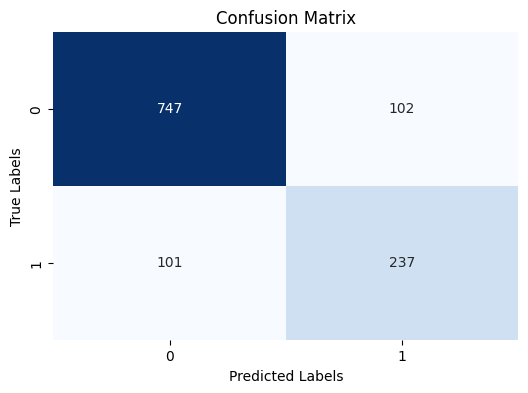


Class-wise Accuracy:
Class 0: 747/849 (87.99%)
Class 1: 237/338 (70.12%)

Precision-Recall Curve:


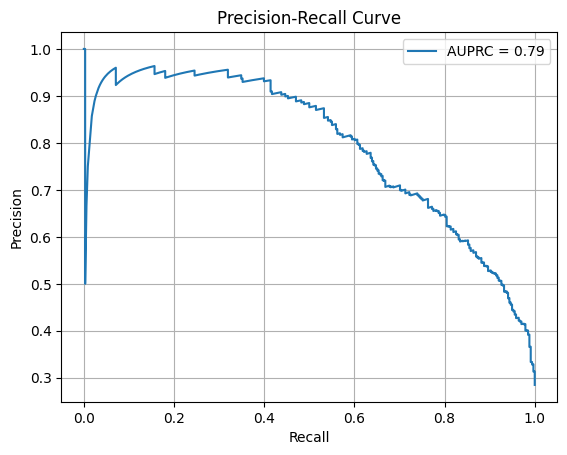


ROC Curve:


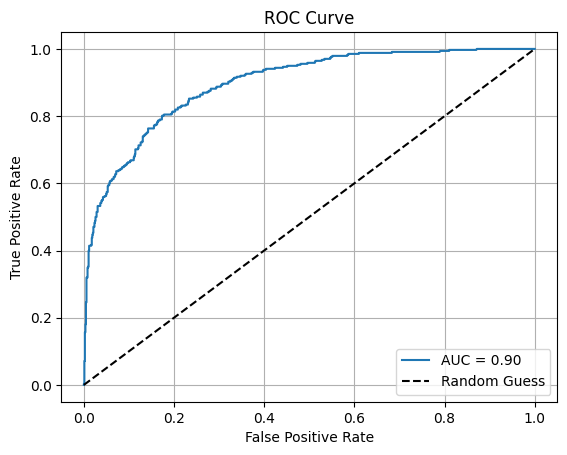


Mean F1 Score: 0.7903
Balanced Accuracy: 0.7905
Average AUPRC: 0.7947

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       849
           1       0.70      0.70      0.70       338

    accuracy                           0.83      1187
   macro avg       0.79      0.79      0.79      1187
weighted avg       0.83      0.83      0.83      1187

Fold No: 2
Epoch [1/100], Loss: 0.6844, Accuracy: 0.5878
Validation Loss: 0.6919, Validation Accuracy: 0.6239
Epoch [2/100], Loss: 0.6469, Accuracy: 0.7037
Validation Loss: 0.6299, Validation Accuracy: 0.6856
Epoch [3/100], Loss: 0.6096, Accuracy: 0.7656
Validation Loss: 0.6009, Validation Accuracy: 0.7068
Epoch [4/100], Loss: 0.5855, Accuracy: 0.8132
Validation Loss: 0.5898, Validation Accuracy: 0.7168
Epoch [5/100], Loss: 0.5757, Accuracy: 0.8280
Validation Loss: 0.5850, Validation Accuracy: 0.7153
Epoch [6/100], Loss: 0.5693, Accuracy: 0.8354
Validation Loss: 0.5874, V

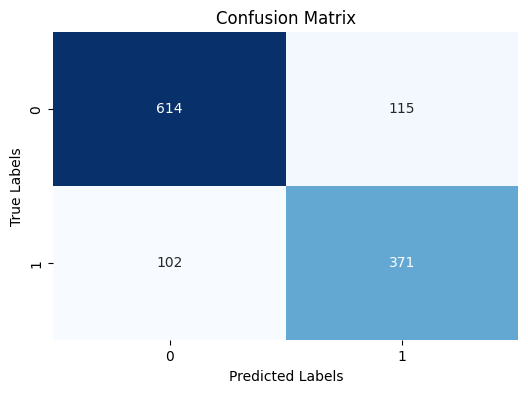


Class-wise Accuracy:
Class 0: 614/729 (84.22%)
Class 1: 371/473 (78.44%)

Precision-Recall Curve:


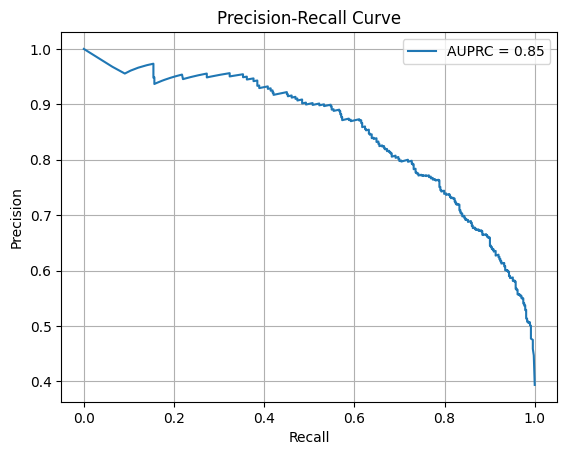


ROC Curve:


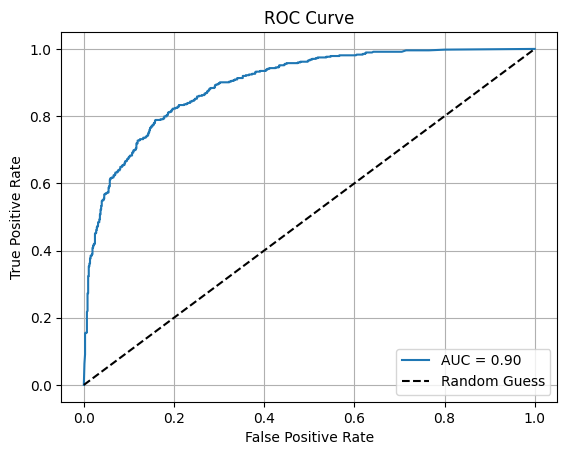


Mean F1 Score: 0.8118
Balanced Accuracy: 0.8133
Average AUPRC: 0.8518

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       729
           1       0.76      0.78      0.77       473

    accuracy                           0.82      1202
   macro avg       0.81      0.81      0.81      1202
weighted avg       0.82      0.82      0.82      1202

Fold No: 3
Epoch [1/100], Loss: 0.6851, Accuracy: 0.6074
Validation Loss: 0.6838, Validation Accuracy: 0.5888
Epoch [2/100], Loss: 0.6690, Accuracy: 0.6454
Validation Loss: 0.6584, Validation Accuracy: 0.6748
Epoch [3/100], Loss: 0.6344, Accuracy: 0.7398
Validation Loss: 0.6146, Validation Accuracy: 0.7387
Epoch [4/100], Loss: 0.6026, Accuracy: 0.7787
Validation Loss: 0.5961, Validation Accuracy: 0.7665
Epoch [5/100], Loss: 0.5883, Accuracy: 0.8037
Validation Loss: 0.5864, Validation Accuracy: 0.7782
Epoch [6/100], Loss: 0.5734, Accuracy: 0.8307
Validation Loss: 0.5821, V

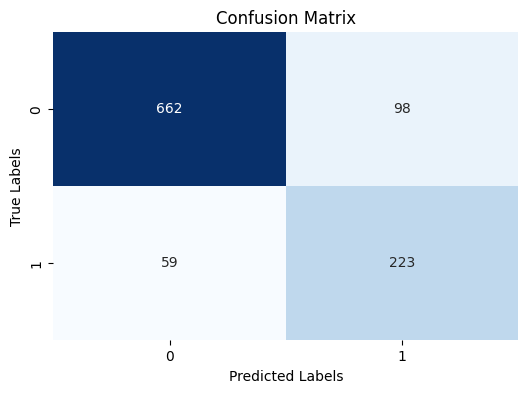


Class-wise Accuracy:
Class 0: 662/760 (87.11%)
Class 1: 223/282 (79.08%)

Precision-Recall Curve:


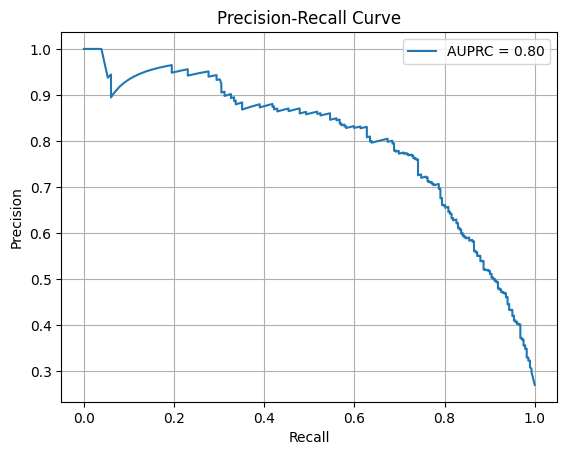


ROC Curve:


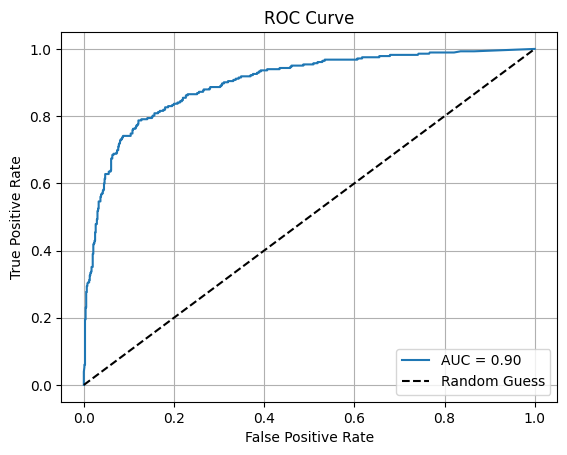


Mean F1 Score: 0.8168
Balanced Accuracy: 0.8309
Average AUPRC: 0.8005

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       760
           1       0.69      0.79      0.74       282

    accuracy                           0.85      1042
   macro avg       0.81      0.83      0.82      1042
weighted avg       0.86      0.85      0.85      1042

Fold No: 4
Epoch [1/100], Loss: 0.6905, Accuracy: 0.5503
Validation Loss: 0.7078, Validation Accuracy: 0.5367
Epoch [2/100], Loss: 0.6720, Accuracy: 0.6499
Validation Loss: 0.6848, Validation Accuracy: 0.6289
Epoch [3/100], Loss: 0.6373, Accuracy: 0.7229
Validation Loss: 0.5985, Validation Accuracy: 0.7696
Epoch [4/100], Loss: 0.6033, Accuracy: 0.7761
Validation Loss: 0.5764, Validation Accuracy: 0.7983
Epoch [5/100], Loss: 0.5878, Accuracy: 0.8042
Validation Loss: 0.5764, Validation Accuracy: 0.8165
Epoch [6/100], Loss: 0.5723, Accuracy: 0.8348
Validation Loss: 0.5810, V

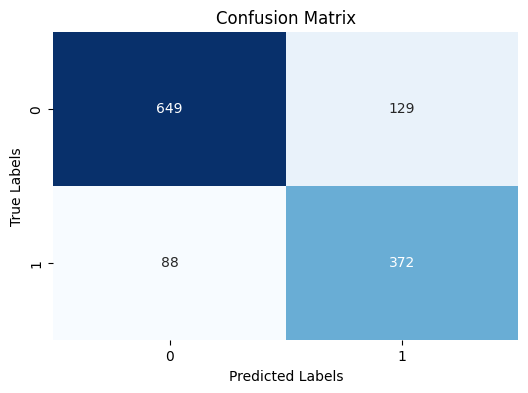


Class-wise Accuracy:
Class 0: 649/778 (83.42%)
Class 1: 372/460 (80.87%)

Precision-Recall Curve:


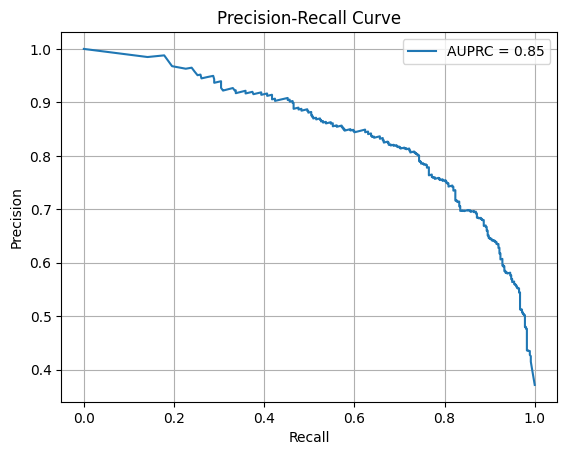


ROC Curve:


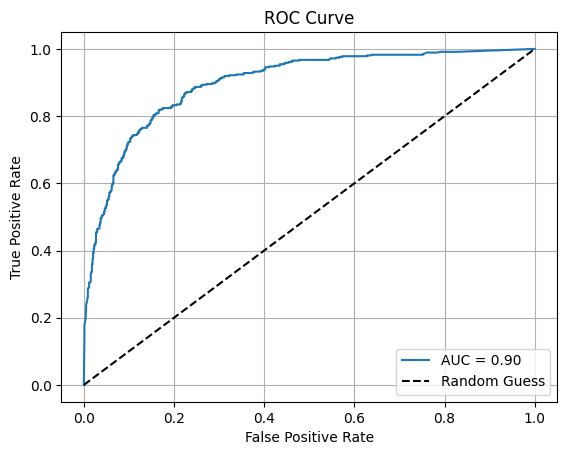


Mean F1 Score: 0.8155
Balanced Accuracy: 0.8214
Average AUPRC: 0.8488

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       778
           1       0.74      0.81      0.77       460

    accuracy                           0.82      1238
   macro avg       0.81      0.82      0.82      1238
weighted avg       0.83      0.82      0.83      1238

Fold No: 5
Epoch [1/100], Loss: 0.6870, Accuracy: 0.5677
Validation Loss: 0.6811, Validation Accuracy: 0.6407
Epoch [2/100], Loss: 0.6603, Accuracy: 0.6862
Validation Loss: 0.6449, Validation Accuracy: 0.7219
Epoch [3/100], Loss: 0.6058, Accuracy: 0.7836
Validation Loss: 0.5858, Validation Accuracy: 0.8044
Epoch [4/100], Loss: 0.5834, Accuracy: 0.8156
Validation Loss: 0.5745, Validation Accuracy: 0.7966
Epoch [5/100], Loss: 0.5708, Accuracy: 0.8367
Validation Loss: 0.5683, Validation Accuracy: 0.8142
Epoch [6/100], Loss: 0.5605, Accuracy: 0.8532
Validation Loss: 0.6123, V

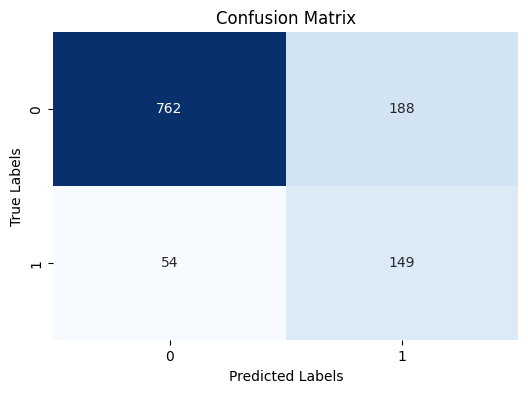


Class-wise Accuracy:
Class 0: 762/950 (80.21%)
Class 1: 149/203 (73.40%)

Precision-Recall Curve:


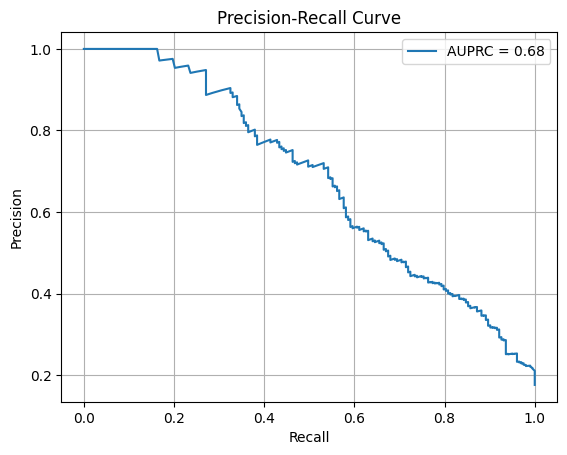


ROC Curve:


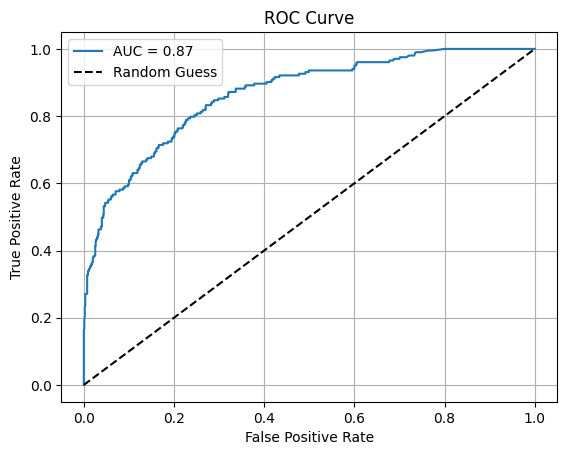


Mean F1 Score: 0.7074
Balanced Accuracy: 0.7680
Average AUPRC: 0.6778

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       950
           1       0.44      0.73      0.55       203

    accuracy                           0.79      1153
   macro avg       0.69      0.77      0.71      1153
weighted avg       0.85      0.79      0.81      1153


PARAMETER SET 1 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7905
   Fold 2: 0.8133
   Fold 3: 0.8309
   Fold 4: 0.8214
   Fold 5: 0.7680

2) Average balanced accuracy across all folds: 0.8048

3) Average AUPRC across all folds: 0.7947

4) AUPRC per fold:
   Fold 1: 0.7947
   Fold 2: 0.8518
   Fold 3: 0.8005
   Fold 4: 0.8488
   Fold 5: 0.6778

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.8711
   Class 1: 0.7908



OSError: Cannot save file into a non-existent directory: 'F:\CODING\py\newnotebooks'

In [ ]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

top_params = [
    {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 8.41673746313518e-06, 'weight_decay': 2.671260614647494e-05, 'batch_size': 10}, # Accuracy: 0.5649, Trial: 7
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.1, 'learning_rate': 3.1698115236603614e-06, 'weight_decay': 4.8990822406347735e-06, 'batch_size': 10}, # Accuracy: 0.5447, Trial: 18
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 4.041251088887564e-06, 'weight_decay': 5.788250075003372e-06, 'batch_size': 10}, # Accuracy: 0.5413, Trial: 17
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 2.553105885330496e-05, 'weight_decay': 7.720918959587612e-06, 'batch_size': 10}, # Accuracy: 0.5046, Trial: 13
    {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.2, 'learning_rate': 0.00010371656791920614, 'weight_decay': 0.0002740103506586785, 'batch_size': 16}  # Accuracy: 0.4867, Trial: 11
]

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

# Model and training configurations
num_classes = 2
input_size = 224 * 3
epochs = 100
input_size = 224*3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file

    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }

    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc

    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)

    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])

    # Check if file exists
    file_exists = os.path.isfile(csv_path)

    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")
    
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Loop through all parameter sets
for param_idx, params in enumerate(top_params):
    print(f"\n{'='*80}")
    print(f"RUNNING PARAMETER SET {param_idx + 1}/5")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Extract parameters
    hidden_size = params["hidden_size"]
    num_layers = params.get("num_layers", 1)
    dropout = params["dropout"]
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']

    # Initialize lists for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')

        # Initialize model, loss, and optimizer
        fold_model = LstmAttention(
              input_size=input_size,
              hidden_size=hidden_size,
              num_layers=num_layers,
              num_classes=num_classes,
              dropout=dropout
              ).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)

        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*train_data.shape[3]))
        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)

        early_stopping = EarlyStopping(patience=10)

        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold]
            val_data = val_data.reshape((val_data.shape[0],val_data.shape[1],val_data.shape[2]*val_data.shape[3]))  # reshape to lstm input shape
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold]
        test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*test_data.shape[3]))  # reshape to lstm input shape
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Calculate class-wise accuracy
        class_accuracies = cm.diagonal() / cm.sum(axis=1)
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)

    # Find best fold based on balanced accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]

    print("\n" + "="*60)
    print(f"PARAMETER SET {param_idx + 1} RESULTS SUMMARY")
    print("="*60)

    print(f'\n1) Balanced accuracy for each fold:')
    for i, acc in enumerate(fold_accuracies):
        print(f'   Fold {i+1}: {acc:.4f}')

    print(f'\n2) Average balanced accuracy across all folds: {mean_accuracy:.4f}')

    print(f'\n3) Average AUPRC across all folds: {average_auprc:.4f}')

    print(f'\n4) AUPRC per fold:')
    for i, auprc in enumerate(fold_auprcs):
        print(f'   Fold {i+1}: {auprc:.4f}')

    print(f'\n5) Best fold class-wise accuracy (Fold {best_fold_idx+1}):')
    for i, class_acc in enumerate(best_fold_class_accuracies):
        print(f'   Class {i}: {class_acc:.4f}')

    print("\n" + "="*60)
    
    # Save results for this parameter set
    model_info = f"LstmAttention_paramset_{param_idx+1}_hidden_{hidden_size}_layers_{num_layers}_dropout_{dropout}"

print(f"\n{'='*80}")
print("ALL PARAMETER SETS COMPLETED!")
print(f"{'='*80}")


<h1> REST OF THE 4 TRIALS


RUNNING PARAMETER SET 1/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.1, 'learning_rate': 3.1698115236603614e-06, 'weight_decay': 4.8990822406347735e-06, 'batch_size': 10}

Fold No: 1
Epoch [1/100], Loss: 0.6799, Accuracy: 0.6214
Validation Loss: 0.6579, Validation Accuracy: 0.6525
Epoch [2/100], Loss: 0.6331, Accuracy: 0.7486
Validation Loss: 0.6413, Validation Accuracy: 0.7130
Epoch [3/100], Loss: 0.5948, Accuracy: 0.7881
Validation Loss: 0.5722, Validation Accuracy: 0.7437
Epoch [4/100], Loss: 0.5694, Accuracy: 0.8366
Validation Loss: 0.5898, Validation Accuracy: 0.7839
Epoch [5/100], Loss: 0.5597, Accuracy: 0.8465
Validation Loss: 0.5793, Validation Accuracy: 0.7891
Epoch [6/100], Loss: 0.5472, Accuracy: 0.8749
Validation Loss: 0.5904, Validation Accuracy: 0.7850
Epoch [7/100], Loss: 0.5445, Accuracy: 0.8827
Validation Loss: 0.5843, Validation Accuracy: 0.7922
Epoch [8/100], Loss: 0.5350, Accuracy: 0.8959
Validation Loss: 0.5852, Validation Accuracy: 0.7878
Epo

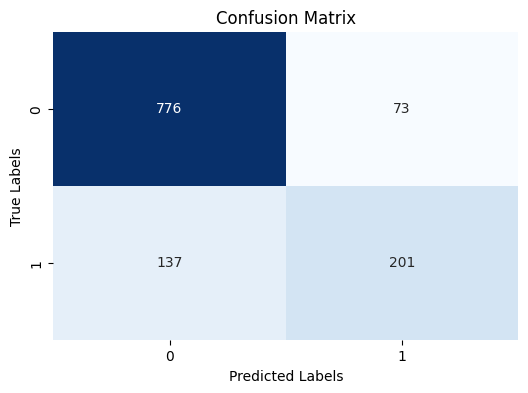


Class-wise Accuracy:
Class 0: 776/849 (91.40%)
Class 1: 201/338 (59.47%)

Precision-Recall Curve:


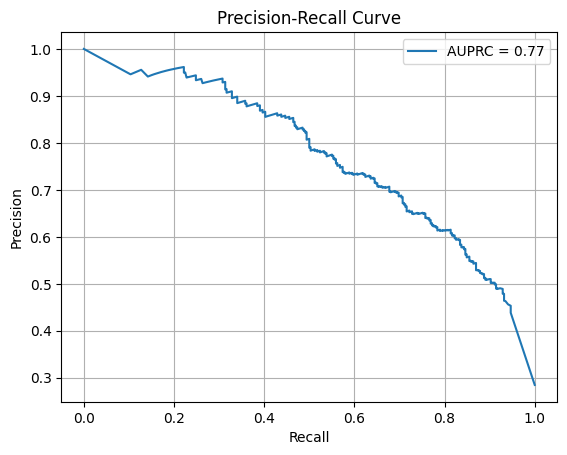


ROC Curve:


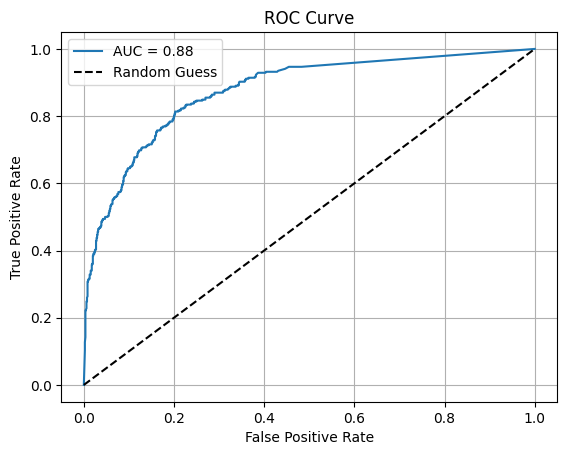


Mean F1 Score: 0.7688
Balanced Accuracy: 0.7543
Average AUPRC: 0.7709

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       849
           1       0.73      0.59      0.66       338

    accuracy                           0.82      1187
   macro avg       0.79      0.75      0.77      1187
weighted avg       0.82      0.82      0.82      1187

Fold No: 2
Epoch [1/100], Loss: 0.6836, Accuracy: 0.6042
Validation Loss: 0.6672, Validation Accuracy: 0.6231
Epoch [2/100], Loss: 0.6460, Accuracy: 0.7228
Validation Loss: 0.6408, Validation Accuracy: 0.7276
Epoch [3/100], Loss: 0.6090, Accuracy: 0.7693
Validation Loss: 0.6052, Validation Accuracy: 0.7278
Epoch [4/100], Loss: 0.5857, Accuracy: 0.8127
Validation Loss: 0.5957, Validation Accuracy: 0.7338
Epoch [5/100], Loss: 0.5740, Accuracy: 0.8302
Validation Loss: 0.5990, Validation Accuracy: 0.7730
Epoch [6/100], Loss: 0.5578, Accuracy: 0.8587
Validation Loss: 0.5892, V

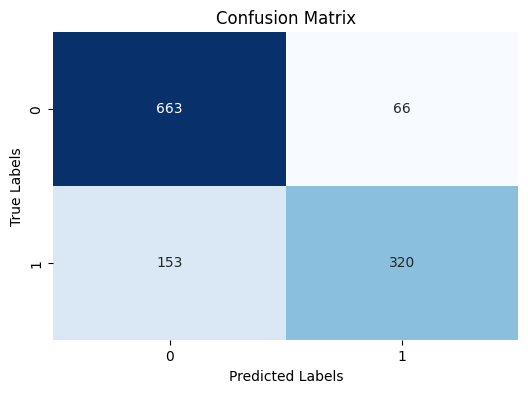


Class-wise Accuracy:
Class 0: 663/729 (90.95%)
Class 1: 320/473 (67.65%)

Precision-Recall Curve:


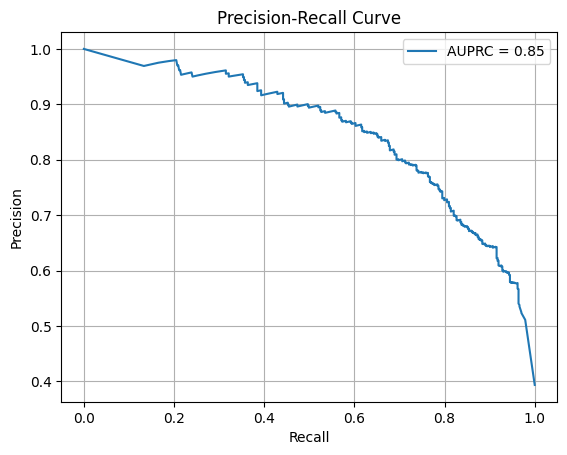


ROC Curve:


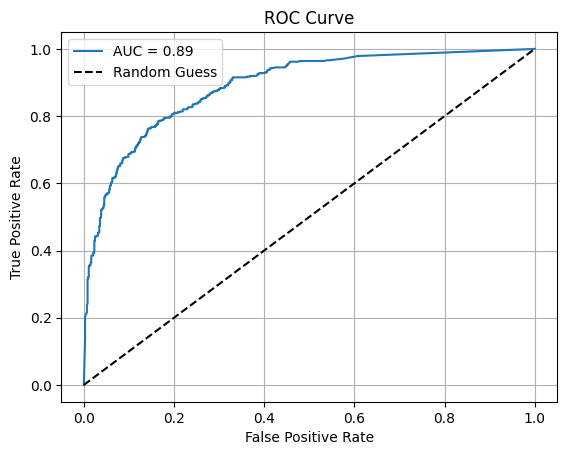


Mean F1 Score: 0.8017
Balanced Accuracy: 0.7930
Average AUPRC: 0.8509

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       729
           1       0.83      0.68      0.75       473

    accuracy                           0.82      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.82      0.82      0.81      1202

Fold No: 3
Epoch [1/100], Loss: 0.6846, Accuracy: 0.5764
Validation Loss: 0.6729, Validation Accuracy: 0.6233
Epoch [2/100], Loss: 0.6547, Accuracy: 0.7183
Validation Loss: 0.6371, Validation Accuracy: 0.6976
Epoch [3/100], Loss: 0.6187, Accuracy: 0.7707
Validation Loss: 0.6080, Validation Accuracy: 0.7340
Epoch [4/100], Loss: 0.5956, Accuracy: 0.7942
Validation Loss: 0.5976, Validation Accuracy: 0.7640
Epoch [5/100], Loss: 0.5796, Accuracy: 0.8187
Validation Loss: 0.5990, Validation Accuracy: 0.7896
Epoch [6/100], Loss: 0.5681, Accuracy: 0.8477
Validation Loss: 0.5860, V

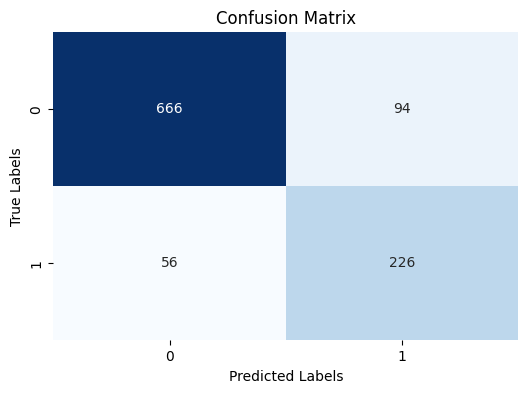


Class-wise Accuracy:
Class 0: 666/760 (87.63%)
Class 1: 226/282 (80.14%)

Precision-Recall Curve:


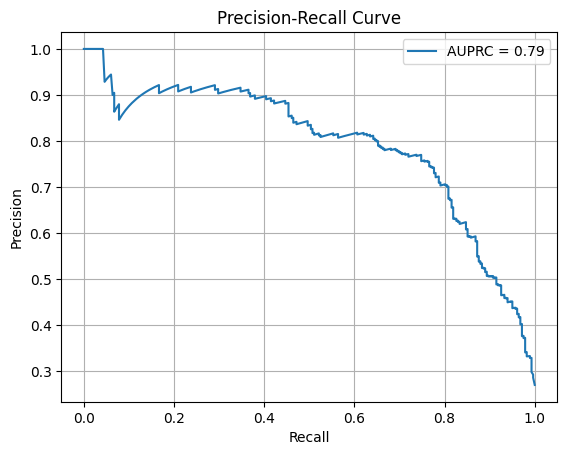


ROC Curve:


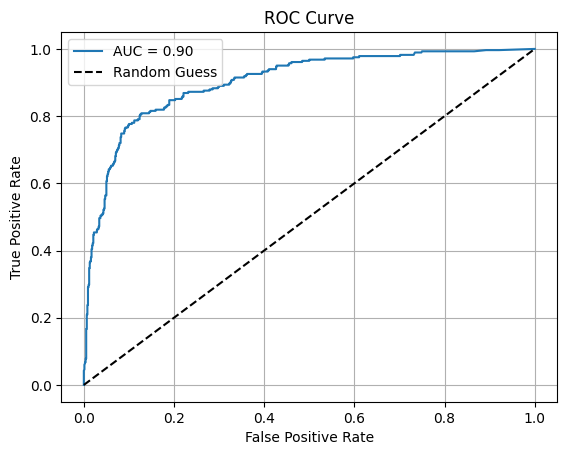


Mean F1 Score: 0.8248
Balanced Accuracy: 0.8389
Average AUPRC: 0.7921

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       760
           1       0.71      0.80      0.75       282

    accuracy                           0.86      1042
   macro avg       0.81      0.84      0.82      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6867, Accuracy: 0.5893
Validation Loss: 0.6842, Validation Accuracy: 0.6418
Epoch [2/100], Loss: 0.6680, Accuracy: 0.6746
Validation Loss: 0.6532, Validation Accuracy: 0.7153
Epoch [3/100], Loss: 0.6362, Accuracy: 0.7288
Validation Loss: 0.6174, Validation Accuracy: 0.7506
Epoch [4/100], Loss: 0.6050, Accuracy: 0.7806
Validation Loss: 0.5914, Validation Accuracy: 0.7818
Epoch [5/100], Loss: 0.5838, Accuracy: 0.8166
Validation Loss: 0.5680, Validation Accuracy: 0.8222
Epoch [6/100], Loss: 0.5746, Accuracy: 0.8264
Validation Loss: 0.5597, V

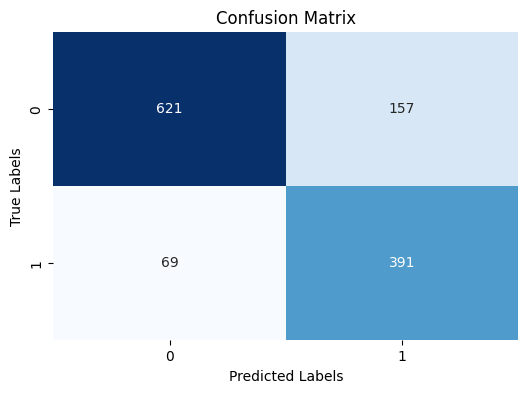


Class-wise Accuracy:
Class 0: 621/778 (79.82%)
Class 1: 391/460 (85.00%)

Precision-Recall Curve:


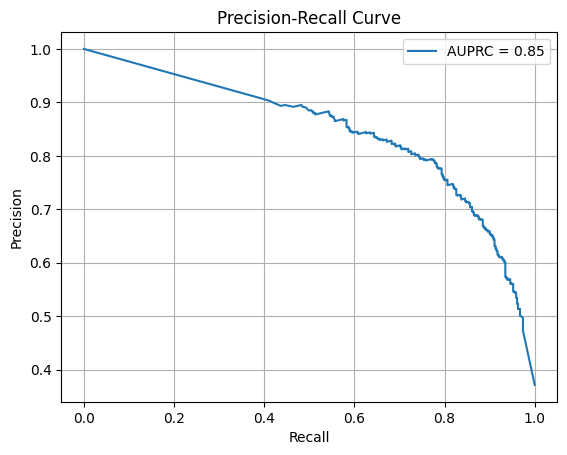


ROC Curve:


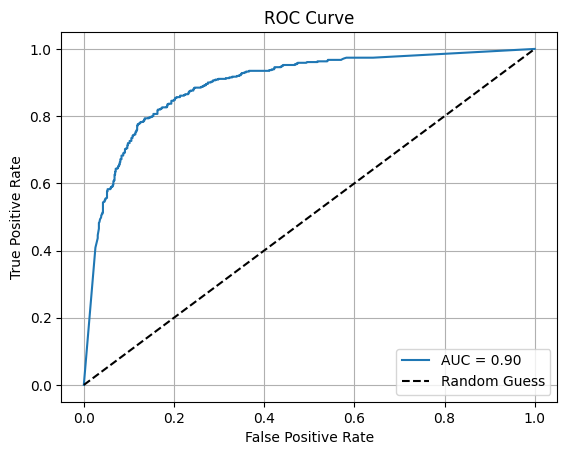


Mean F1 Score: 0.8109
Balanced Accuracy: 0.8241
Average AUPRC: 0.8457

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       778
           1       0.71      0.85      0.78       460

    accuracy                           0.82      1238
   macro avg       0.81      0.82      0.81      1238
weighted avg       0.83      0.82      0.82      1238

Fold No: 5
Epoch [1/100], Loss: 0.6861, Accuracy: 0.5723
Validation Loss: 0.6769, Validation Accuracy: 0.6659
Epoch [2/100], Loss: 0.6617, Accuracy: 0.6816
Validation Loss: 0.6340, Validation Accuracy: 0.7625
Epoch [3/100], Loss: 0.6209, Accuracy: 0.7539
Validation Loss: 0.5923, Validation Accuracy: 0.8031
Epoch [4/100], Loss: 0.5901, Accuracy: 0.8047
Validation Loss: 0.5796, Validation Accuracy: 0.8122
Epoch [5/100], Loss: 0.5759, Accuracy: 0.8207
Validation Loss: 0.5976, Validation Accuracy: 0.7953
Epoch [6/100], Loss: 0.5615, Accuracy: 0.8477
Validation Loss: 0.5667, V

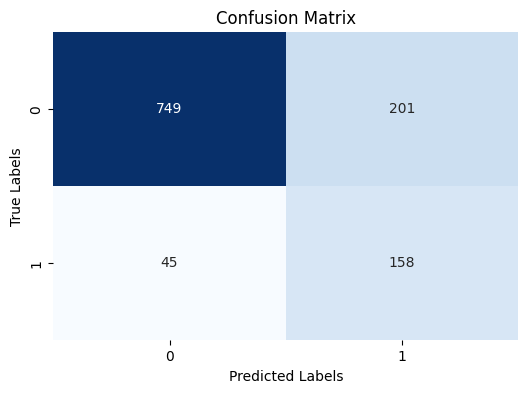


Class-wise Accuracy:
Class 0: 749/950 (78.84%)
Class 1: 158/203 (77.83%)

Precision-Recall Curve:


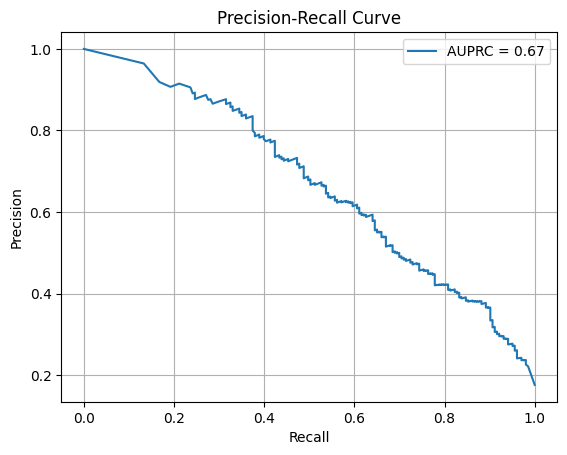


ROC Curve:


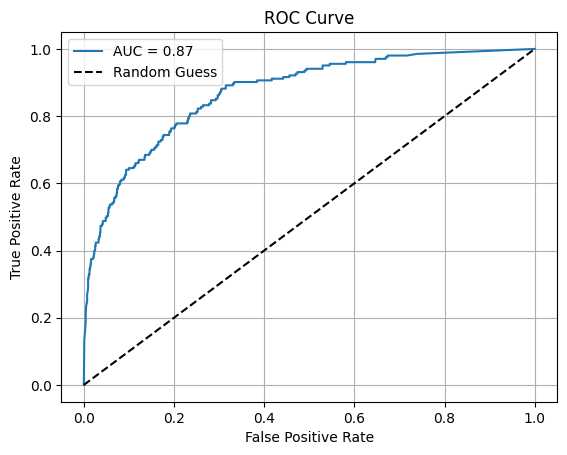


Mean F1 Score: 0.7106
Balanced Accuracy: 0.7834
Average AUPRC: 0.6703

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       950
           1       0.44      0.78      0.56       203

    accuracy                           0.79      1153
   macro avg       0.69      0.78      0.71      1153
weighted avg       0.85      0.79      0.81      1153


PARAMETER SET 1 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7543
   Fold 2: 0.7930
   Fold 3: 0.8389
   Fold 4: 0.8241
   Fold 5: 0.7834

2) Average balanced accuracy across all folds: 0.7987

3) Average AUPRC across all folds: 0.7860

4) AUPRC per fold:
   Fold 1: 0.7709
   Fold 2: 0.8509
   Fold 3: 0.7921
   Fold 4: 0.8457
   Fold 5: 0.6703

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.8763
   Class 1: 0.8014


RUNNING PARAMETER SET 2/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 

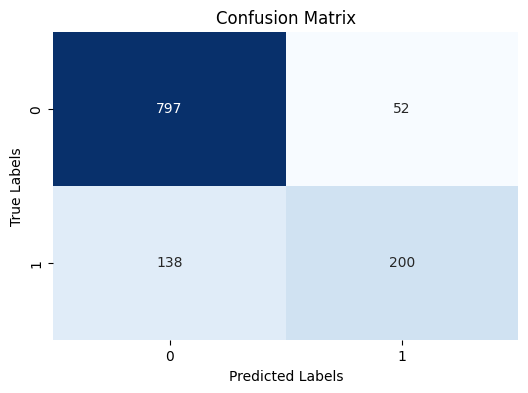


Class-wise Accuracy:
Class 0: 797/849 (93.88%)
Class 1: 200/338 (59.17%)

Precision-Recall Curve:


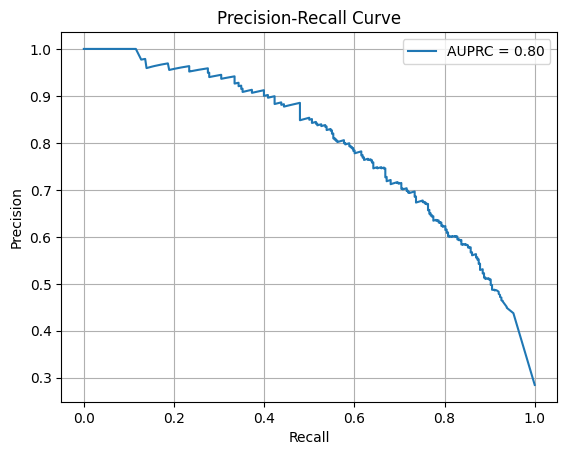


ROC Curve:


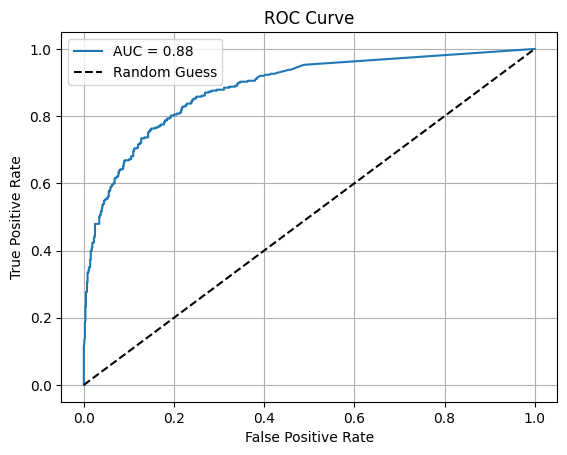


Mean F1 Score: 0.7857
Balanced Accuracy: 0.7652
Average AUPRC: 0.7954

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       849
           1       0.79      0.59      0.68       338

    accuracy                           0.84      1187
   macro avg       0.82      0.77      0.79      1187
weighted avg       0.84      0.84      0.83      1187

Fold No: 2
Epoch [1/100], Loss: 0.6836, Accuracy: 0.5767
Validation Loss: 0.6645, Validation Accuracy: 0.5900
Epoch [2/100], Loss: 0.6389, Accuracy: 0.7312
Validation Loss: 0.6209, Validation Accuracy: 0.6426
Epoch [3/100], Loss: 0.5989, Accuracy: 0.7847
Validation Loss: 0.6037, Validation Accuracy: 0.7300
Epoch [4/100], Loss: 0.5806, Accuracy: 0.8180
Validation Loss: 0.6061, Validation Accuracy: 0.7514
Epoch [5/100], Loss: 0.5674, Accuracy: 0.8466
Validation Loss: 0.5849, Validation Accuracy: 0.7325
Epoch [6/100], Loss: 0.5602, Accuracy: 0.8566
Validation Loss: 0.5868, V

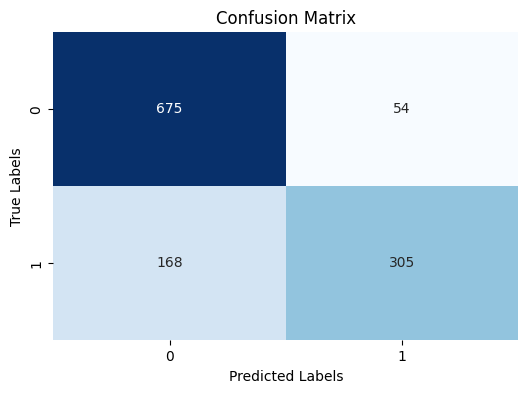


Class-wise Accuracy:
Class 0: 675/729 (92.59%)
Class 1: 305/473 (64.48%)

Precision-Recall Curve:


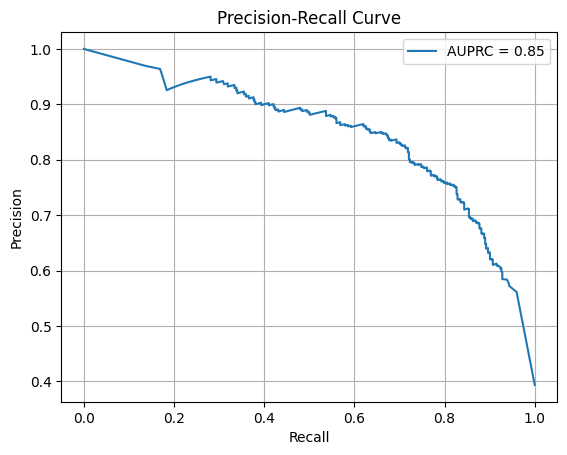


ROC Curve:


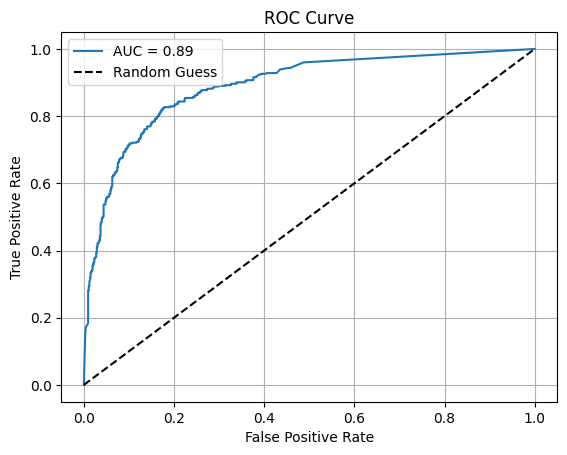


Mean F1 Score: 0.7960
Balanced Accuracy: 0.7854
Average AUPRC: 0.8470

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       729
           1       0.85      0.64      0.73       473

    accuracy                           0.82      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.82      0.82      0.81      1202

Fold No: 3
Epoch [1/100], Loss: 0.6828, Accuracy: 0.5929
Validation Loss: 0.6883, Validation Accuracy: 0.5734
Epoch [2/100], Loss: 0.6517, Accuracy: 0.6943
Validation Loss: 0.6397, Validation Accuracy: 0.7373
Epoch [3/100], Loss: 0.6078, Accuracy: 0.7837
Validation Loss: 0.6018, Validation Accuracy: 0.7483
Epoch [4/100], Loss: 0.5922, Accuracy: 0.7987
Validation Loss: 0.6056, Validation Accuracy: 0.7830
Epoch [5/100], Loss: 0.5747, Accuracy: 0.8252
Validation Loss: 0.5909, Validation Accuracy: 0.7658
Epoch [6/100], Loss: 0.5582, Accuracy: 0.8551
Validation Loss: 0.5837, V

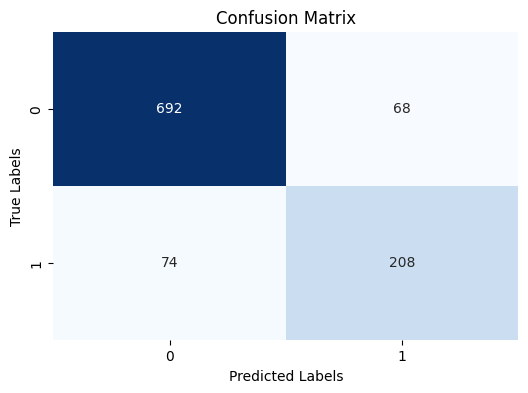


Class-wise Accuracy:
Class 0: 692/760 (91.05%)
Class 1: 208/282 (73.76%)

Precision-Recall Curve:


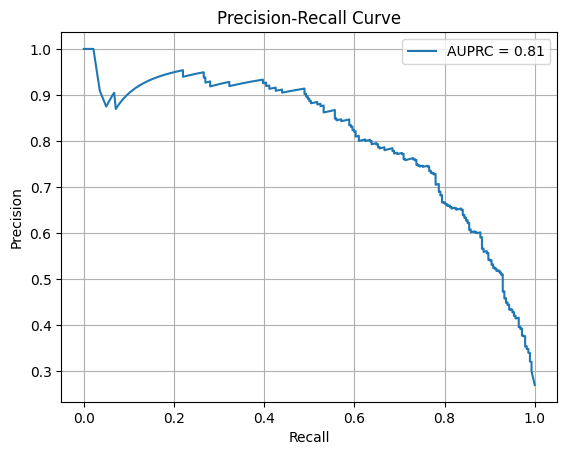


ROC Curve:


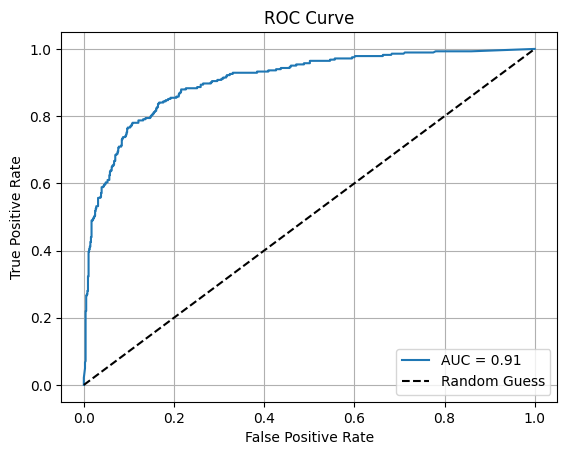


Mean F1 Score: 0.8262
Balanced Accuracy: 0.8241
Average AUPRC: 0.8072

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       760
           1       0.75      0.74      0.75       282

    accuracy                           0.86      1042
   macro avg       0.83      0.82      0.83      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6860, Accuracy: 0.5932
Validation Loss: 0.6662, Validation Accuracy: 0.6962
Epoch [2/100], Loss: 0.6613, Accuracy: 0.6770
Validation Loss: 0.6311, Validation Accuracy: 0.7360
Epoch [3/100], Loss: 0.6210, Accuracy: 0.7490
Validation Loss: 0.6054, Validation Accuracy: 0.7765
Epoch [4/100], Loss: 0.5971, Accuracy: 0.7949
Validation Loss: 0.5989, Validation Accuracy: 0.7949
Epoch [5/100], Loss: 0.5797, Accuracy: 0.8111
Validation Loss: 0.5815, Validation Accuracy: 0.8141
Epoch [6/100], Loss: 0.5695, Accuracy: 0.8343
Validation Loss: 0.6001, V

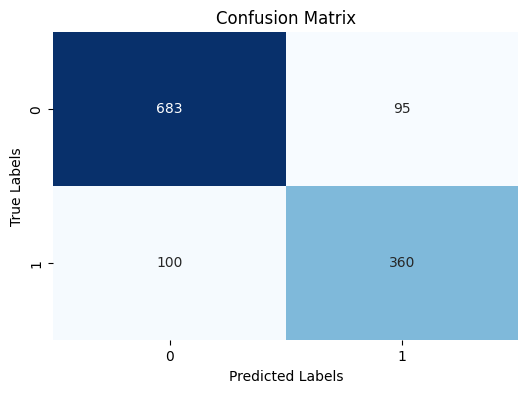


Class-wise Accuracy:
Class 0: 683/778 (87.79%)
Class 1: 360/460 (78.26%)

Precision-Recall Curve:


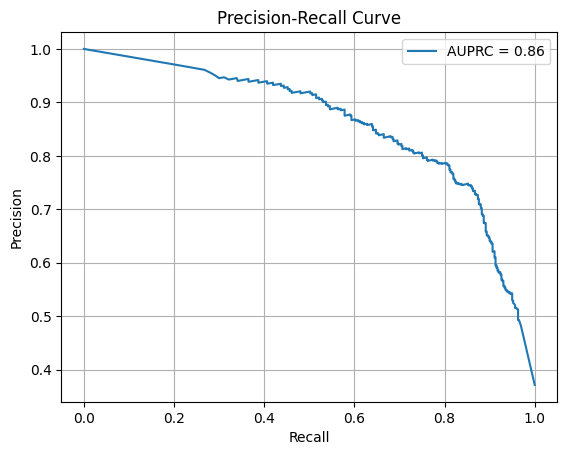


ROC Curve:


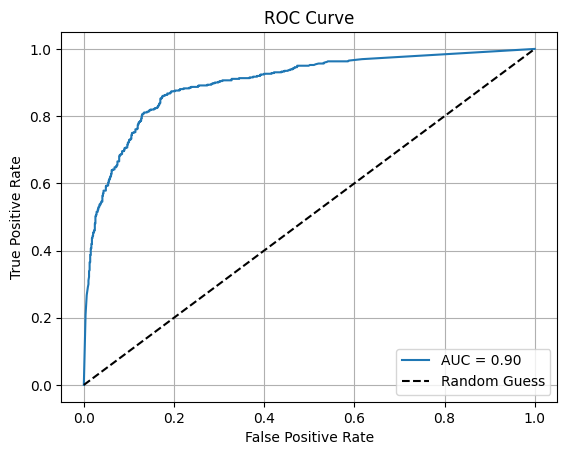


Mean F1 Score: 0.8310
Balanced Accuracy: 0.8303
Average AUPRC: 0.8596

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       778
           1       0.79      0.78      0.79       460

    accuracy                           0.84      1238
   macro avg       0.83      0.83      0.83      1238
weighted avg       0.84      0.84      0.84      1238

Fold No: 5
Epoch [1/100], Loss: 0.6845, Accuracy: 0.5778
Validation Loss: 0.6727, Validation Accuracy: 0.6870
Epoch [2/100], Loss: 0.6504, Accuracy: 0.6999
Validation Loss: 0.6058, Validation Accuracy: 0.7610
Epoch [3/100], Loss: 0.6129, Accuracy: 0.7571
Validation Loss: 0.5843, Validation Accuracy: 0.8031
Epoch [4/100], Loss: 0.5856, Accuracy: 0.8179
Validation Loss: 0.5718, Validation Accuracy: 0.8126
Epoch [5/100], Loss: 0.5729, Accuracy: 0.8298
Validation Loss: 0.5675, Validation Accuracy: 0.8159
Epoch [6/100], Loss: 0.5610, Accuracy: 0.8449
Validation Loss: 0.5786, V

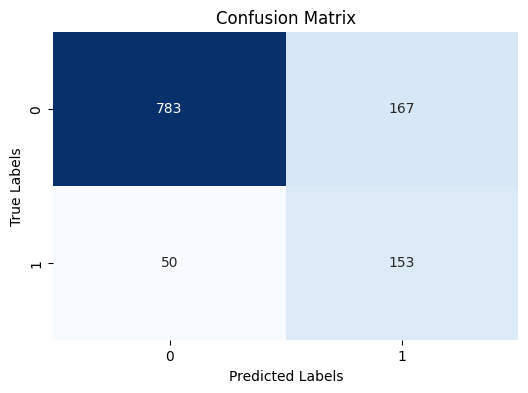


Class-wise Accuracy:
Class 0: 783/950 (82.42%)
Class 1: 153/203 (75.37%)

Precision-Recall Curve:


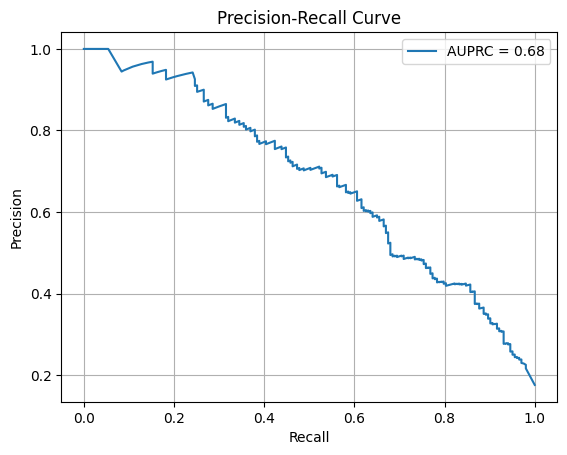


ROC Curve:


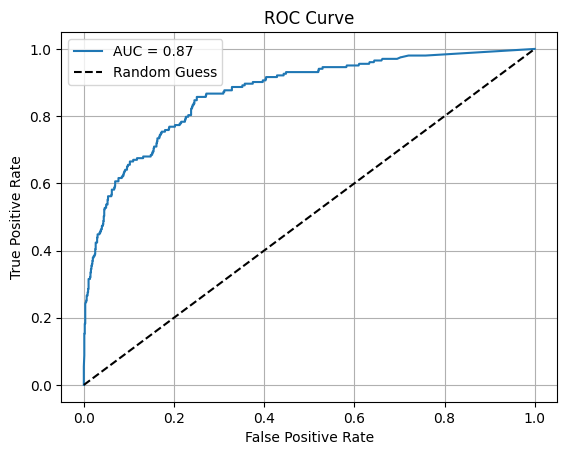


Mean F1 Score: 0.7317
Balanced Accuracy: 0.7890
Average AUPRC: 0.6776

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       950
           1       0.48      0.75      0.59       203

    accuracy                           0.81      1153
   macro avg       0.71      0.79      0.73      1153
weighted avg       0.86      0.81      0.83      1153


PARAMETER SET 2 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7652
   Fold 2: 0.7854
   Fold 3: 0.8241
   Fold 4: 0.8303
   Fold 5: 0.7890

2) Average balanced accuracy across all folds: 0.7988

3) Average AUPRC across all folds: 0.7973

4) AUPRC per fold:
   Fold 1: 0.7954
   Fold 2: 0.8470
   Fold 3: 0.8072
   Fold 4: 0.8596
   Fold 5: 0.6776

5) Best fold class-wise accuracy (Fold 4):
   Class 0: 0.8779
   Class 1: 0.7826


RUNNING PARAMETER SET 3/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 

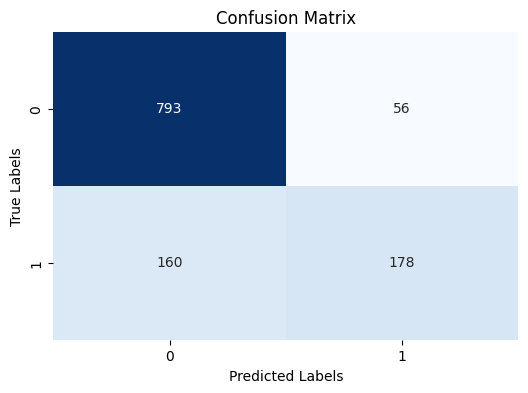


Class-wise Accuracy:
Class 0: 793/849 (93.40%)
Class 1: 178/338 (52.66%)

Precision-Recall Curve:


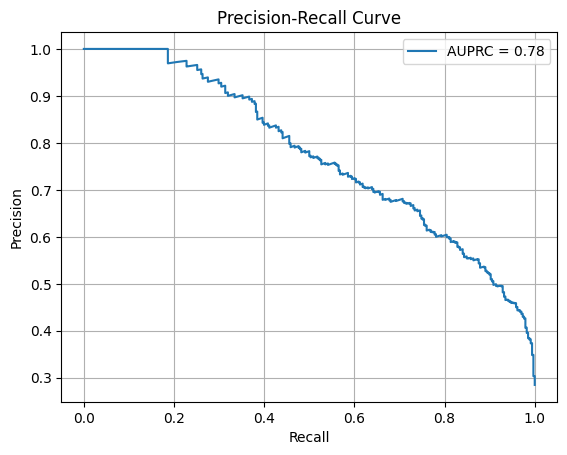


ROC Curve:


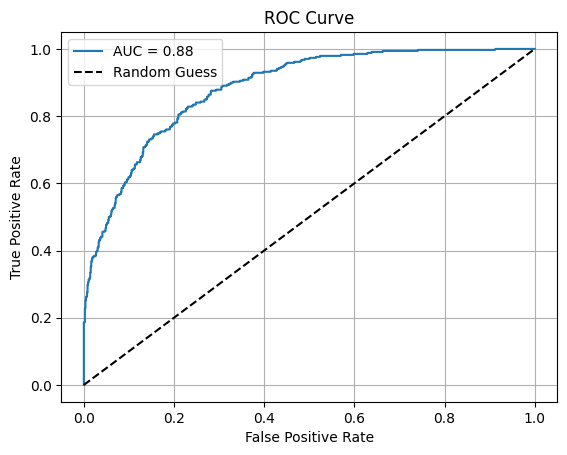


Mean F1 Score: 0.7513
Balanced Accuracy: 0.7303
Average AUPRC: 0.7750

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       849
           1       0.76      0.53      0.62       338

    accuracy                           0.82      1187
   macro avg       0.80      0.73      0.75      1187
weighted avg       0.81      0.82      0.81      1187

Fold No: 2
Epoch [1/100], Loss: 0.6400, Accuracy: 0.6937
Validation Loss: 0.5972, Validation Accuracy: 0.7014
Epoch [2/100], Loss: 0.5941, Accuracy: 0.7841
Validation Loss: 0.5985, Validation Accuracy: 0.7241
Epoch [3/100], Loss: 0.5870, Accuracy: 0.8016
Validation Loss: 0.6011, Validation Accuracy: 0.6611
Epoch [4/100], Loss: 0.5759, Accuracy: 0.8196
Validation Loss: 0.5725, Validation Accuracy: 0.7499
Epoch [5/100], Loss: 0.5733, Accuracy: 0.8164
Validation Loss: 0.5841, Validation Accuracy: 0.6764
Epoch [6/100], Loss: 0.5702, Accuracy: 0.8317
Validation Loss: 0.5786, V

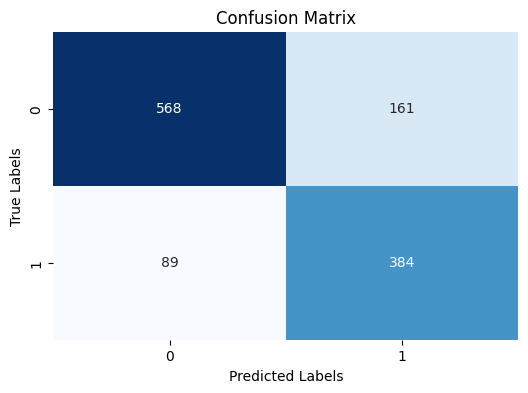


Class-wise Accuracy:
Class 0: 568/729 (77.91%)
Class 1: 384/473 (81.18%)

Precision-Recall Curve:


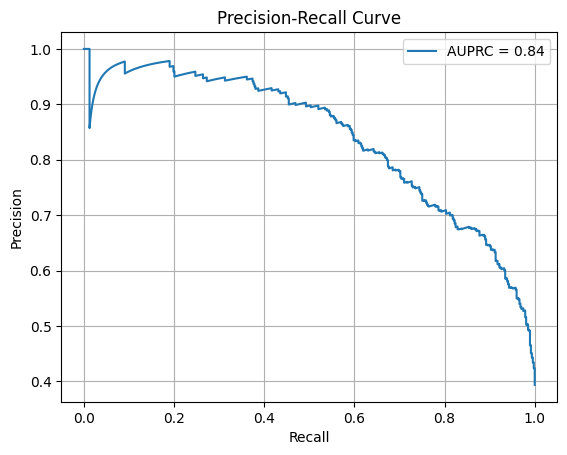


ROC Curve:


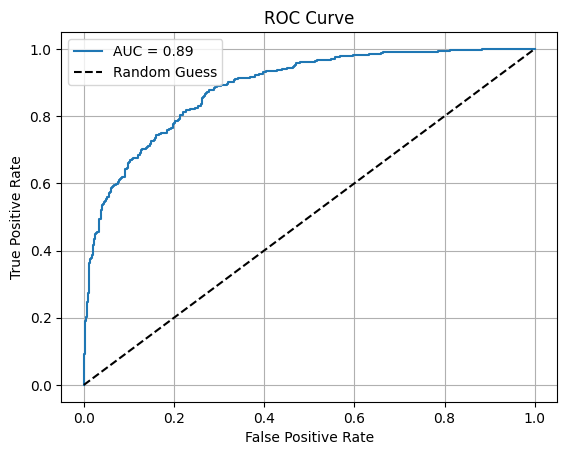


Mean F1 Score: 0.7870
Balanced Accuracy: 0.7955
Average AUPRC: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       729
           1       0.70      0.81      0.75       473

    accuracy                           0.79      1202
   macro avg       0.78      0.80      0.79      1202
weighted avg       0.80      0.79      0.79      1202

Fold No: 3
Epoch [1/100], Loss: 0.6555, Accuracy: 0.6508
Validation Loss: 0.6320, Validation Accuracy: 0.7477
Epoch [2/100], Loss: 0.6024, Accuracy: 0.7707
Validation Loss: 0.5855, Validation Accuracy: 0.7651
Epoch [3/100], Loss: 0.5884, Accuracy: 0.7942
Validation Loss: 0.5861, Validation Accuracy: 0.8022
Epoch [4/100], Loss: 0.5828, Accuracy: 0.8047
Validation Loss: 0.5811, Validation Accuracy: 0.7986
Epoch [5/100], Loss: 0.5835, Accuracy: 0.8047
Validation Loss: 0.5775, Validation Accuracy: 0.7904
Epoch [6/100], Loss: 0.5797, Accuracy: 0.8087
Validation Loss: 0.5735, V

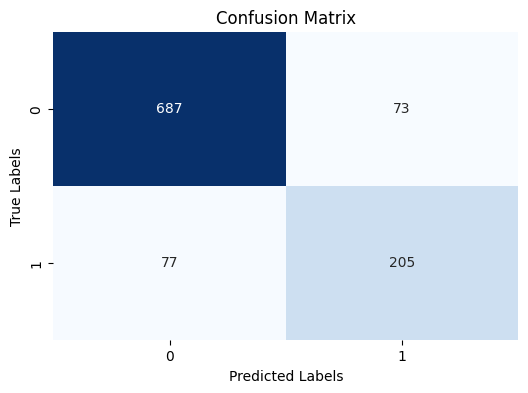


Class-wise Accuracy:
Class 0: 687/760 (90.39%)
Class 1: 205/282 (72.70%)

Precision-Recall Curve:


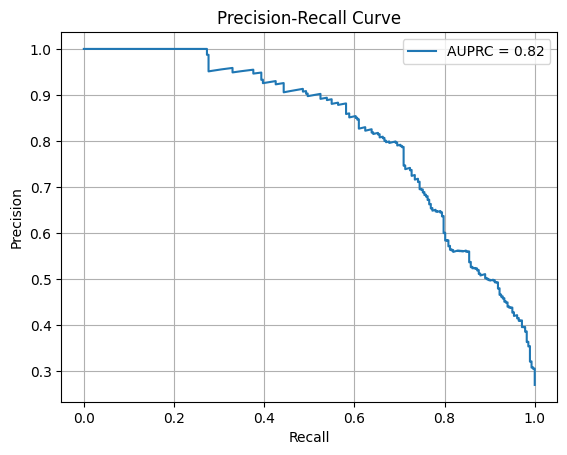


ROC Curve:


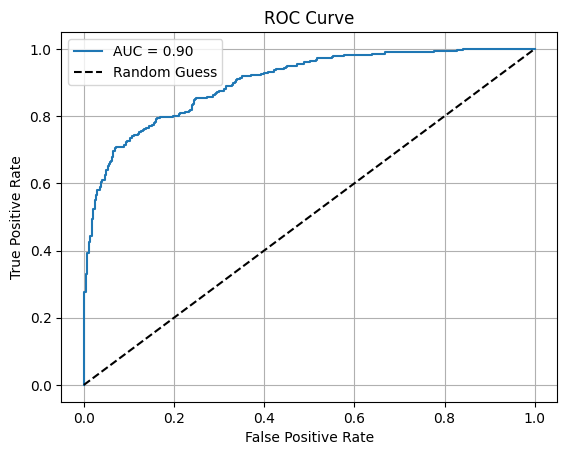


Mean F1 Score: 0.8169
Balanced Accuracy: 0.8154
Average AUPRC: 0.8221

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       760
           1       0.74      0.73      0.73       282

    accuracy                           0.86      1042
   macro avg       0.82      0.82      0.82      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6637, Accuracy: 0.6262
Validation Loss: 0.6299, Validation Accuracy: 0.7513
Epoch [2/100], Loss: 0.6085, Accuracy: 0.7569
Validation Loss: 0.5670, Validation Accuracy: 0.8015
Epoch [3/100], Loss: 0.5931, Accuracy: 0.7786
Validation Loss: 0.5613, Validation Accuracy: 0.8039
Epoch [4/100], Loss: 0.5913, Accuracy: 0.7885
Validation Loss: 0.5505, Validation Accuracy: 0.8102
Epoch [5/100], Loss: 0.5902, Accuracy: 0.7904
Validation Loss: 0.5535, Validation Accuracy: 0.7824
Epoch [6/100], Loss: 0.5846, Accuracy: 0.8062
Validation Loss: 0.5782, V

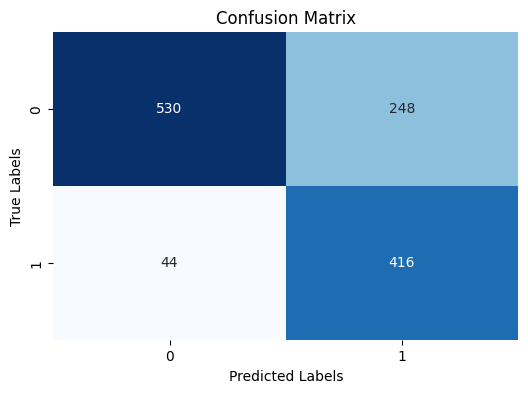


Class-wise Accuracy:
Class 0: 530/778 (68.12%)
Class 1: 416/460 (90.43%)

Precision-Recall Curve:


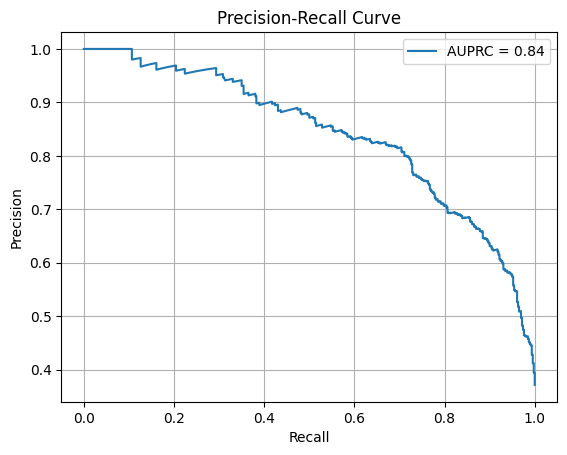


ROC Curve:


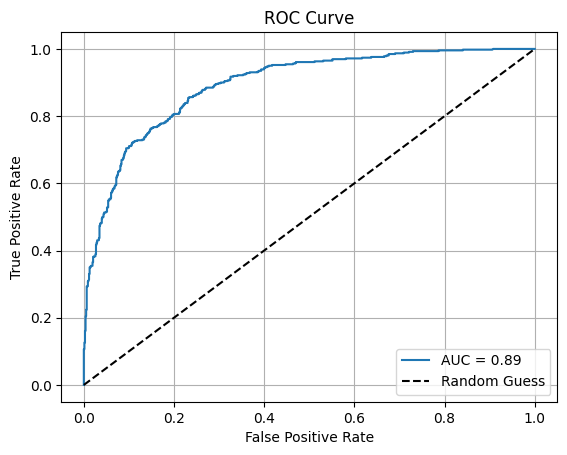


Mean F1 Score: 0.7621
Balanced Accuracy: 0.7928
Average AUPRC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       778
           1       0.63      0.90      0.74       460

    accuracy                           0.76      1238
   macro avg       0.77      0.79      0.76      1238
weighted avg       0.81      0.76      0.77      1238

Fold No: 5
Epoch [1/100], Loss: 0.6592, Accuracy: 0.6354
Validation Loss: 0.6187, Validation Accuracy: 0.7570
Epoch [2/100], Loss: 0.6003, Accuracy: 0.7717
Validation Loss: 0.5976, Validation Accuracy: 0.7933
Epoch [3/100], Loss: 0.5843, Accuracy: 0.7996
Validation Loss: 0.5855, Validation Accuracy: 0.8197
Epoch [4/100], Loss: 0.5771, Accuracy: 0.8138
Validation Loss: 0.6055, Validation Accuracy: 0.7883
Epoch [5/100], Loss: 0.5770, Accuracy: 0.8092
Validation Loss: 0.5660, Validation Accuracy: 0.8179
Epoch [6/100], Loss: 0.5790, Accuracy: 0.8129
Validation Loss: 0.5719, V

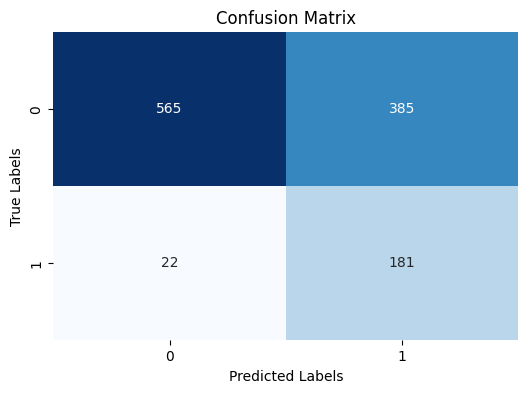


Class-wise Accuracy:
Class 0: 565/950 (59.47%)
Class 1: 181/203 (89.16%)

Precision-Recall Curve:


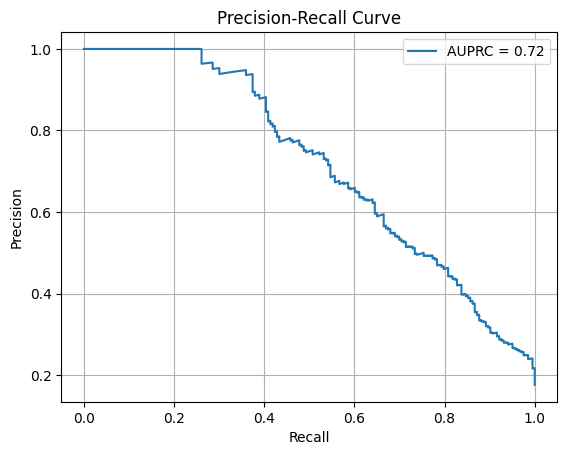


ROC Curve:


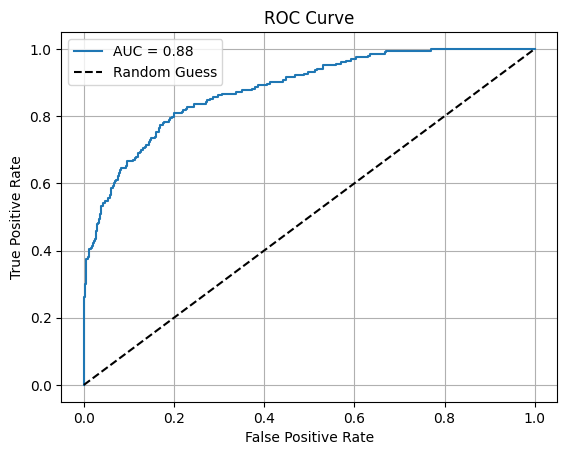


Mean F1 Score: 0.6030
Balanced Accuracy: 0.7432
Average AUPRC: 0.7157

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.74       950
           1       0.32      0.89      0.47       203

    accuracy                           0.65      1153
   macro avg       0.64      0.74      0.60      1153
weighted avg       0.85      0.65      0.69      1153


PARAMETER SET 3 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7303
   Fold 2: 0.7955
   Fold 3: 0.8154
   Fold 4: 0.7928
   Fold 5: 0.7432

2) Average balanced accuracy across all folds: 0.7754

3) Average AUPRC across all folds: 0.7986

4) AUPRC per fold:
   Fold 1: 0.7750
   Fold 2: 0.8395
   Fold 3: 0.8221
   Fold 4: 0.8404
   Fold 5: 0.7157

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.9039
   Class 1: 0.7270


RUNNING PARAMETER SET 4/5
Parameters: {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.2, 'learning_rate': 0.000103716567919

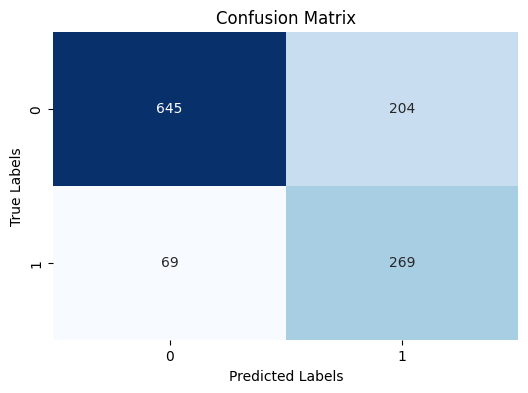


Class-wise Accuracy:
Class 0: 645/849 (75.97%)
Class 1: 269/338 (79.59%)

Precision-Recall Curve:


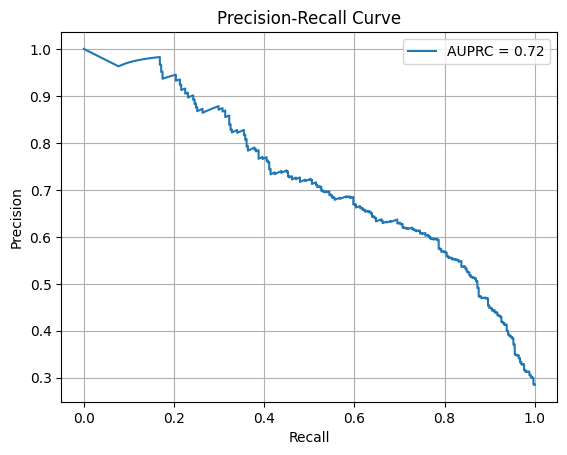


ROC Curve:


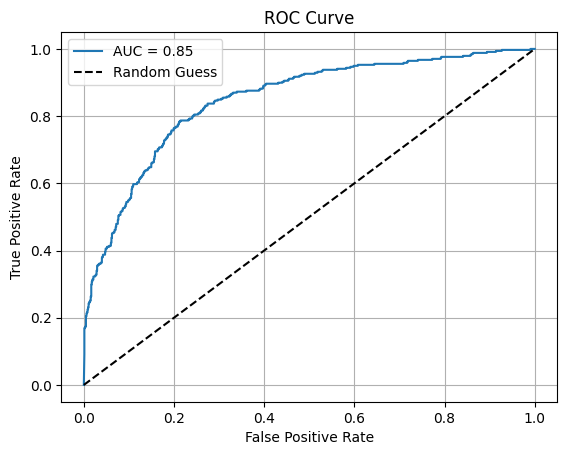


Mean F1 Score: 0.7444
Balanced Accuracy: 0.7778
Average AUPRC: 0.7224

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       849
           1       0.57      0.80      0.66       338

    accuracy                           0.77      1187
   macro avg       0.74      0.78      0.74      1187
weighted avg       0.81      0.77      0.78      1187

Fold No: 2
Epoch [1/100], Loss: 0.6795, Accuracy: 0.5804
Validation Loss: 0.6536, Validation Accuracy: 0.6582
Epoch [2/100], Loss: 0.6441, Accuracy: 0.6937
Validation Loss: 0.6323, Validation Accuracy: 0.5682
Epoch [3/100], Loss: 0.6442, Accuracy: 0.6894
Validation Loss: 0.7381, Validation Accuracy: 0.6365
Epoch [4/100], Loss: 0.6407, Accuracy: 0.6984
Validation Loss: 0.6205, Validation Accuracy: 0.6695
Epoch [5/100], Loss: 0.6221, Accuracy: 0.7249
Validation Loss: 0.7930, Validation Accuracy: 0.6078
Epoch [6/100], Loss: 0.6233, Accuracy: 0.7275
Validation Loss: 0.6336, V

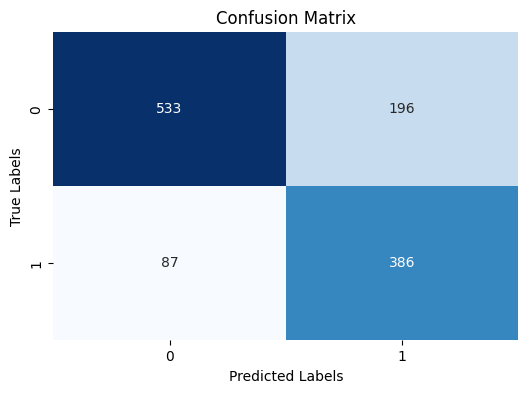


Class-wise Accuracy:
Class 0: 533/729 (73.11%)
Class 1: 386/473 (81.61%)

Precision-Recall Curve:


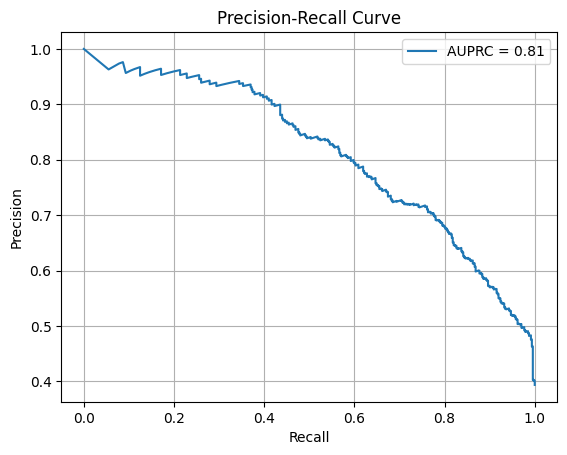


ROC Curve:


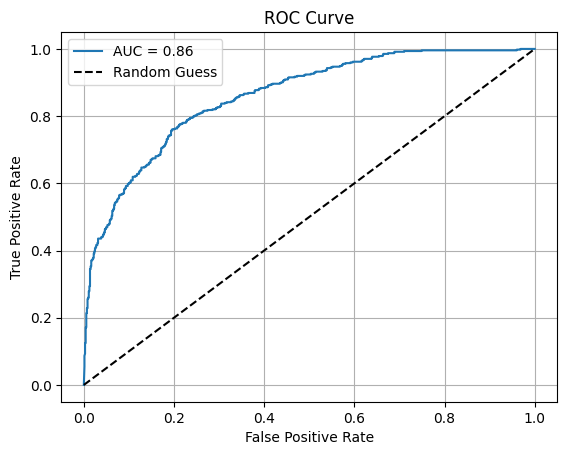


Mean F1 Score: 0.7610
Balanced Accuracy: 0.7736
Average AUPRC: 0.8121

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       729
           1       0.66      0.82      0.73       473

    accuracy                           0.76      1202
   macro avg       0.76      0.77      0.76      1202
weighted avg       0.78      0.76      0.77      1202

Fold No: 3
Epoch [1/100], Loss: 0.6841, Accuracy: 0.5639
Validation Loss: 0.6780, Validation Accuracy: 0.6805
Epoch [2/100], Loss: 0.6471, Accuracy: 0.6873
Validation Loss: 0.6490, Validation Accuracy: 0.6879
Epoch [3/100], Loss: 0.6339, Accuracy: 0.7068
Validation Loss: 0.6469, Validation Accuracy: 0.7250
Epoch [4/100], Loss: 0.6282, Accuracy: 0.7273
Validation Loss: 0.6277, Validation Accuracy: 0.7043
Epoch [5/100], Loss: 0.6273, Accuracy: 0.7218
Validation Loss: 0.6083, Validation Accuracy: 0.7745
Epoch [6/100], Loss: 0.6210, Accuracy: 0.7373
Validation Loss: 0.6381, V

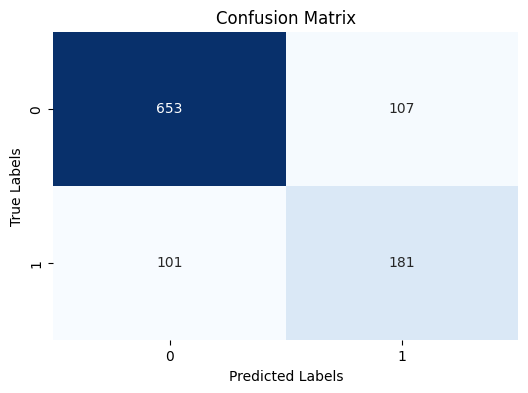


Class-wise Accuracy:
Class 0: 653/760 (85.92%)
Class 1: 181/282 (64.18%)

Precision-Recall Curve:


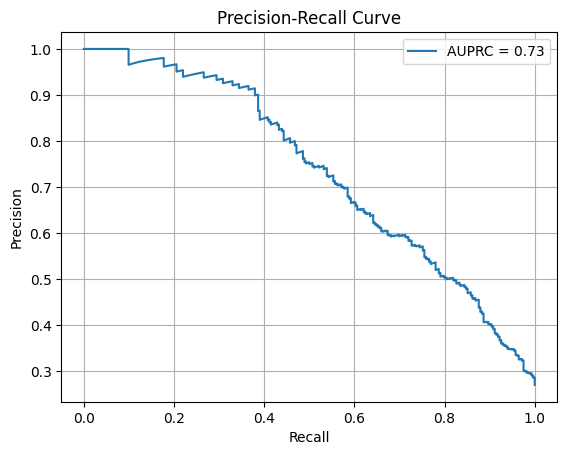


ROC Curve:


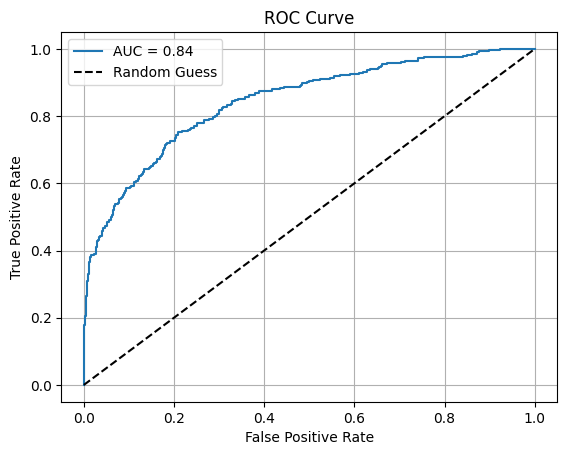


Mean F1 Score: 0.7489
Balanced Accuracy: 0.7505
Average AUPRC: 0.7342

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       760
           1       0.63      0.64      0.64       282

    accuracy                           0.80      1042
   macro avg       0.75      0.75      0.75      1042
weighted avg       0.80      0.80      0.80      1042

Fold No: 4
Epoch [1/100], Loss: 0.6917, Accuracy: 0.5256
Validation Loss: 0.7024, Validation Accuracy: 0.5814
Epoch [2/100], Loss: 0.6655, Accuracy: 0.6381
Validation Loss: 0.6371, Validation Accuracy: 0.7120
Epoch [3/100], Loss: 0.6439, Accuracy: 0.6844
Validation Loss: 0.6249, Validation Accuracy: 0.7245
Epoch [4/100], Loss: 0.6360, Accuracy: 0.6982
Validation Loss: 0.6120, Validation Accuracy: 0.7446
Epoch [5/100], Loss: 0.6455, Accuracy: 0.6898
Validation Loss: 0.6908, Validation Accuracy: 0.6828
Epoch [6/100], Loss: 0.6293, Accuracy: 0.7253
Validation Loss: 0.6510, V

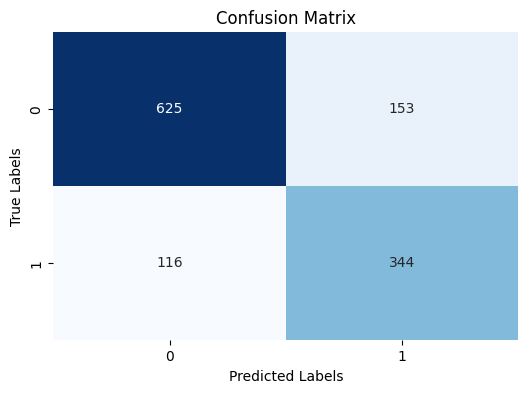


Class-wise Accuracy:
Class 0: 625/778 (80.33%)
Class 1: 344/460 (74.78%)

Precision-Recall Curve:


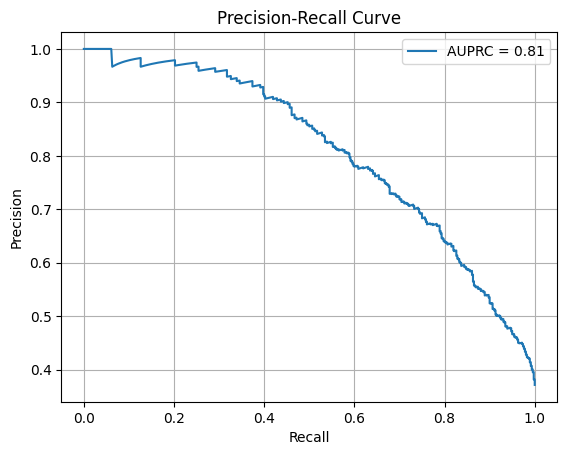


ROC Curve:


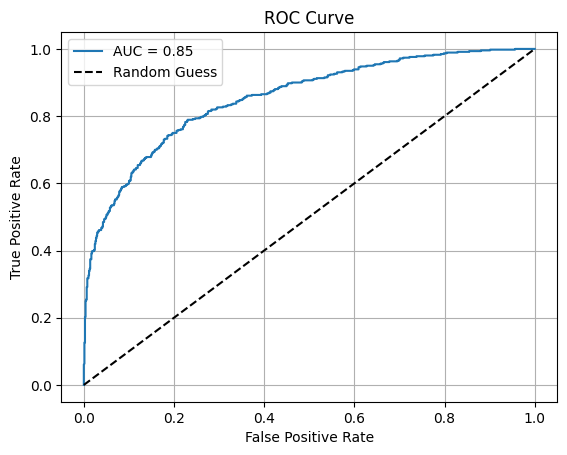


Mean F1 Score: 0.7709
Balanced Accuracy: 0.7756
Average AUPRC: 0.8086

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       778
           1       0.69      0.75      0.72       460

    accuracy                           0.78      1238
   macro avg       0.77      0.78      0.77      1238
weighted avg       0.79      0.78      0.78      1238

Fold No: 5
Epoch [1/100], Loss: 0.6772, Accuracy: 0.5842
Validation Loss: 0.6511, Validation Accuracy: 0.7098
Epoch [2/100], Loss: 0.6455, Accuracy: 0.6825
Validation Loss: 0.6767, Validation Accuracy: 0.6806
Epoch [3/100], Loss: 0.6376, Accuracy: 0.6981
Validation Loss: 0.6134, Validation Accuracy: 0.7532
Epoch [4/100], Loss: 0.6205, Accuracy: 0.7347
Validation Loss: 0.6140, Validation Accuracy: 0.7430
Epoch [5/100], Loss: 0.6219, Accuracy: 0.7324
Validation Loss: 0.5989, Validation Accuracy: 0.7463
Epoch [6/100], Loss: 0.6173, Accuracy: 0.7370
Validation Loss: 0.6298, V

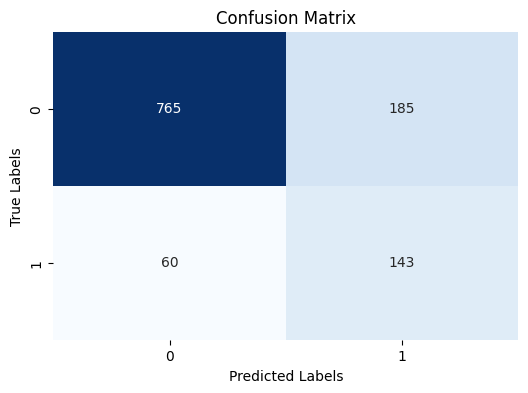


Class-wise Accuracy:
Class 0: 765/950 (80.53%)
Class 1: 143/203 (70.44%)

Precision-Recall Curve:


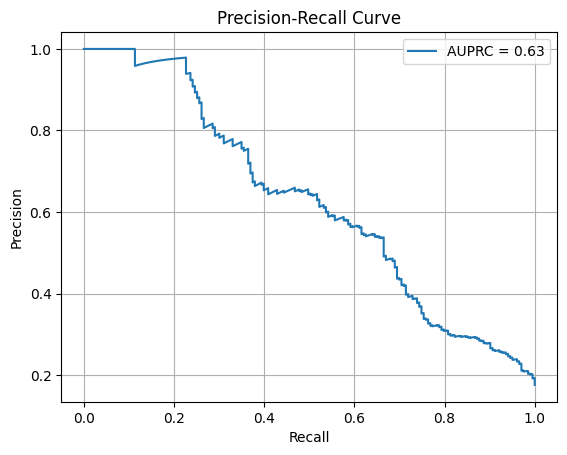


ROC Curve:


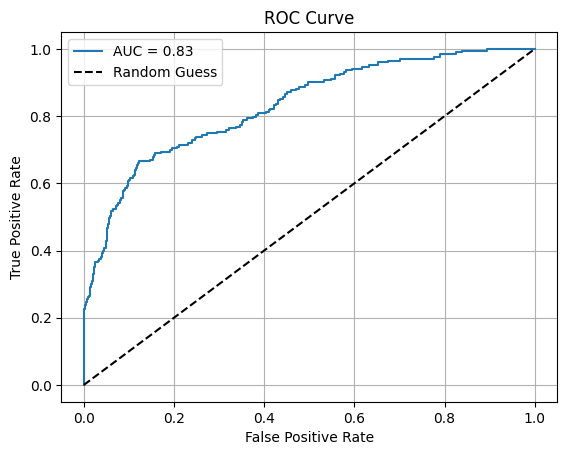


Mean F1 Score: 0.7003
Balanced Accuracy: 0.7548
Average AUPRC: 0.6261

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       950
           1       0.44      0.70      0.54       203

    accuracy                           0.79      1153
   macro avg       0.68      0.75      0.70      1153
weighted avg       0.84      0.79      0.81      1153


PARAMETER SET 4 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7778
   Fold 2: 0.7736
   Fold 3: 0.7505
   Fold 4: 0.7756
   Fold 5: 0.7548

2) Average balanced accuracy across all folds: 0.7665

3) Average AUPRC across all folds: 0.7407

4) AUPRC per fold:
   Fold 1: 0.7224
   Fold 2: 0.8121
   Fold 3: 0.7342
   Fold 4: 0.8086
   Fold 5: 0.6261

5) Best fold class-wise accuracy (Fold 1):
   Class 0: 0.7597
   Class 1: 0.7959


ALL PARAMETER SETS COMPLETED!


In [10]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

top_params = [
    # {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 8.41673746313518e-06, 'weight_decay': 2.671260614647494e-05, 'batch_size': 10}, # Accuracy: 0.5649, Trial: 7
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.1, 'learning_rate': 3.1698115236603614e-06, 'weight_decay': 4.8990822406347735e-06, 'batch_size': 10}, # Accuracy: 0.5447, Trial: 18
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 4.041251088887564e-06, 'weight_decay': 5.788250075003372e-06, 'batch_size': 10}, # Accuracy: 0.5413, Trial: 17
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 2.553105885330496e-05, 'weight_decay': 7.720918959587612e-06, 'batch_size': 10}, # Accuracy: 0.5046, Trial: 13
    {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.2, 'learning_rate': 0.00010371656791920614, 'weight_decay': 0.0002740103506586785, 'batch_size': 16}  # Accuracy: 0.4867, Trial: 11
]

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

# Model and training configurations
num_classes = 2
input_size = 224 * 3
epochs = 100
input_size = 224*3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file

    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }

    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc

    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)

    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])

    # Check if file exists
    file_exists = os.path.isfile(csv_path)

    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")
    
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Loop through all parameter sets
for param_idx, params in enumerate(top_params):
    print(f"\n{'='*80}")
    print(f"RUNNING PARAMETER SET {param_idx + 1}/5")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Extract parameters
    hidden_size = params["hidden_size"]
    num_layers = params.get("num_layers", 1)
    dropout = params["dropout"]
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']

    # Initialize lists for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')

        # Initialize model, loss, and optimizer
        fold_model = LstmAttention(
              input_size=input_size,
              hidden_size=hidden_size,
              num_layers=num_layers,
              num_classes=num_classes,
              dropout=dropout
              ).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)

        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*train_data.shape[3]))
        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)

        early_stopping = EarlyStopping(patience=10)

        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold]
            val_data = val_data.reshape((val_data.shape[0],val_data.shape[1],val_data.shape[2]*val_data.shape[3]))  # reshape to lstm input shape
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold]
        test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*test_data.shape[3]))  # reshape to lstm input shape
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Calculate class-wise accuracy
        class_accuracies = cm.diagonal() / cm.sum(axis=1)
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)

    # Find best fold based on balanced accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]

    print("\n" + "="*60)
    print(f"PARAMETER SET {param_idx + 1} RESULTS SUMMARY")
    print("="*60)

    print(f'\n1) Balanced accuracy for each fold:')
    for i, acc in enumerate(fold_accuracies):
        print(f'   Fold {i+1}: {acc:.4f}')

    print(f'\n2) Average balanced accuracy across all folds: {mean_accuracy:.4f}')

    print(f'\n3) Average AUPRC across all folds: {average_auprc:.4f}')

    print(f'\n4) AUPRC per fold:')
    for i, auprc in enumerate(fold_auprcs):
        print(f'   Fold {i+1}: {auprc:.4f}')

    print(f'\n5) Best fold class-wise accuracy (Fold {best_fold_idx+1}):')
    for i, class_acc in enumerate(best_fold_class_accuracies):
        print(f'   Class {i}: {class_acc:.4f}')

    print("\n" + "="*60)
    
    # Save results for this parameter set
    model_info = f"LstmAttention_paramset_{param_idx+1}_hidden_{hidden_size}_layers_{num_layers}_dropout_{dropout}"

print(f"\n{'='*80}")
print("ALL PARAMETER SETS COMPLETED!")
print(f"{'='*80}")



RUNNING PARAMETER SET 1/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.1, 'learning_rate': 3.1698115236603614e-06, 'weight_decay': 4.8990822406347735e-06, 'batch_size': 10}

Fold No: 1
Epoch [1/100], Loss: 0.6799, Accuracy: 0.6214
Validation Loss: 0.6579, Validation Accuracy: 0.6525
Epoch [2/100], Loss: 0.6331, Accuracy: 0.7486
Validation Loss: 0.6413, Validation Accuracy: 0.7130
Epoch [3/100], Loss: 0.5948, Accuracy: 0.7881
Validation Loss: 0.5722, Validation Accuracy: 0.7437
Epoch [4/100], Loss: 0.5694, Accuracy: 0.8366
Validation Loss: 0.5898, Validation Accuracy: 0.7839
Epoch [5/100], Loss: 0.5597, Accuracy: 0.8465
Validation Loss: 0.5793, Validation Accuracy: 0.7891
Epoch [6/100], Loss: 0.5472, Accuracy: 0.8749
Validation Loss: 0.5904, Validation Accuracy: 0.7850
Epoch [7/100], Loss: 0.5445, Accuracy: 0.8827
Validation Loss: 0.5843, Validation Accuracy: 0.7922
Epoch [8/100], Loss: 0.5350, Accuracy: 0.8959
Validation Loss: 0.5852, Validation Accuracy: 0.7878
Epo

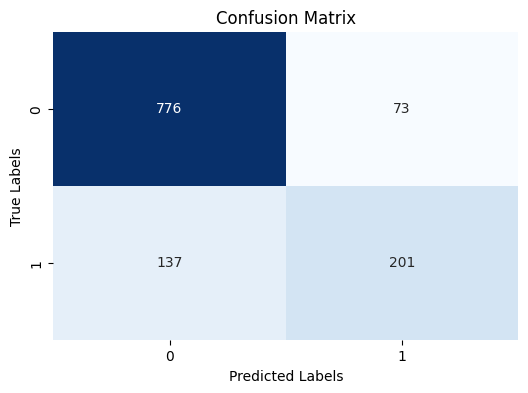


Class-wise Accuracy:
Class 0: 776/849 (91.40%)
Class 1: 201/338 (59.47%)

Precision-Recall Curve:


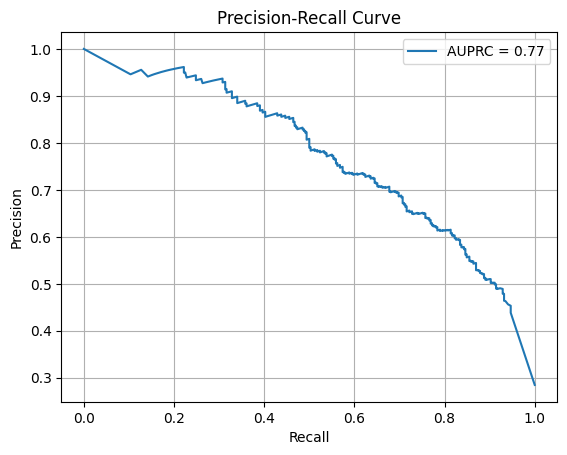


ROC Curve:


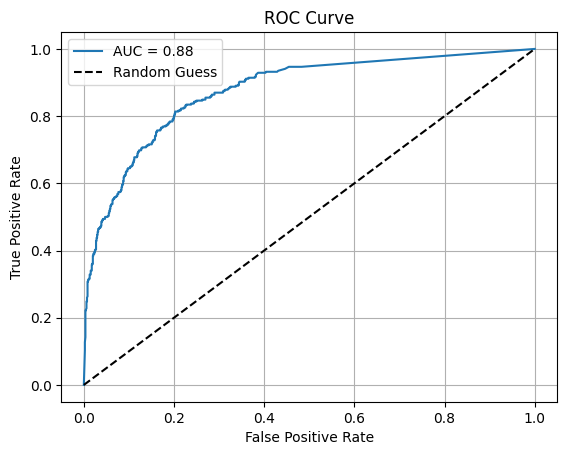


Mean F1 Score: 0.7688
Balanced Accuracy: 0.7543
Average AUPRC: 0.7709

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       849
           1       0.73      0.59      0.66       338

    accuracy                           0.82      1187
   macro avg       0.79      0.75      0.77      1187
weighted avg       0.82      0.82      0.82      1187

Fold No: 2
Epoch [1/100], Loss: 0.6836, Accuracy: 0.6042
Validation Loss: 0.6672, Validation Accuracy: 0.6231
Epoch [2/100], Loss: 0.6460, Accuracy: 0.7228
Validation Loss: 0.6408, Validation Accuracy: 0.7276
Epoch [3/100], Loss: 0.6090, Accuracy: 0.7693
Validation Loss: 0.6052, Validation Accuracy: 0.7278
Epoch [4/100], Loss: 0.5857, Accuracy: 0.8127
Validation Loss: 0.5957, Validation Accuracy: 0.7338
Epoch [5/100], Loss: 0.5740, Accuracy: 0.8302
Validation Loss: 0.5990, Validation Accuracy: 0.7730
Epoch [6/100], Loss: 0.5578, Accuracy: 0.8587
Validation Loss: 0.5892, V

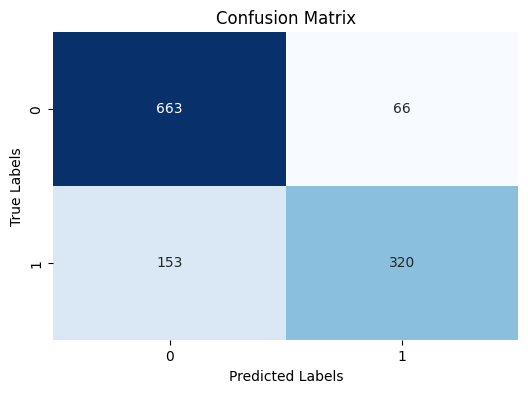


Class-wise Accuracy:
Class 0: 663/729 (90.95%)
Class 1: 320/473 (67.65%)

Precision-Recall Curve:


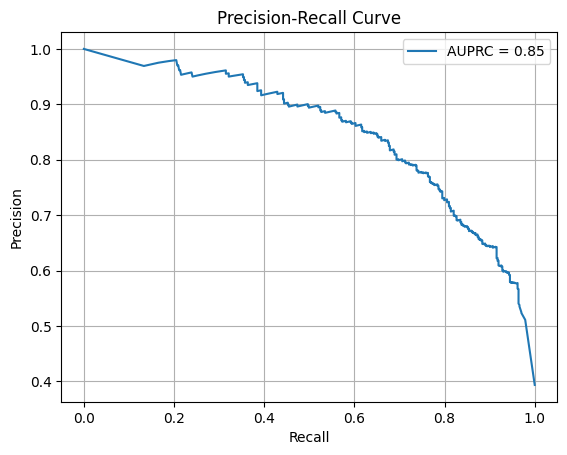


ROC Curve:


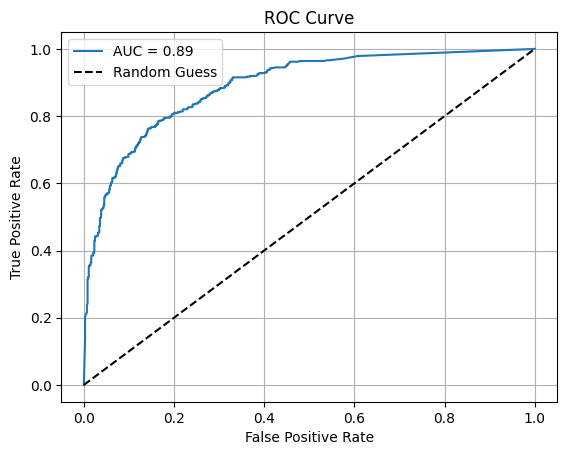


Mean F1 Score: 0.8017
Balanced Accuracy: 0.7930
Average AUPRC: 0.8509

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       729
           1       0.83      0.68      0.75       473

    accuracy                           0.82      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.82      0.82      0.81      1202

Fold No: 3
Epoch [1/100], Loss: 0.6846, Accuracy: 0.5764
Validation Loss: 0.6729, Validation Accuracy: 0.6233
Epoch [2/100], Loss: 0.6547, Accuracy: 0.7183
Validation Loss: 0.6371, Validation Accuracy: 0.6976
Epoch [3/100], Loss: 0.6187, Accuracy: 0.7707
Validation Loss: 0.6080, Validation Accuracy: 0.7340
Epoch [4/100], Loss: 0.5956, Accuracy: 0.7942
Validation Loss: 0.5976, Validation Accuracy: 0.7640
Epoch [5/100], Loss: 0.5796, Accuracy: 0.8187
Validation Loss: 0.5990, Validation Accuracy: 0.7896
Epoch [6/100], Loss: 0.5681, Accuracy: 0.8477
Validation Loss: 0.5860, V

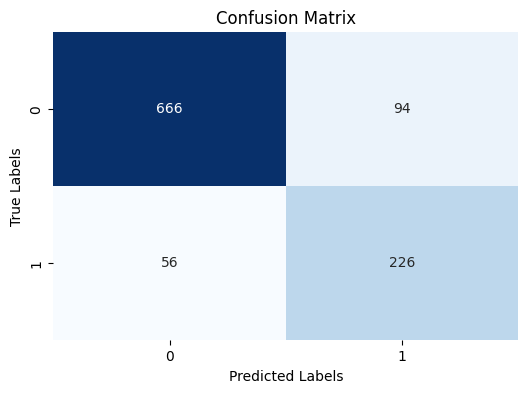


Class-wise Accuracy:
Class 0: 666/760 (87.63%)
Class 1: 226/282 (80.14%)

Precision-Recall Curve:


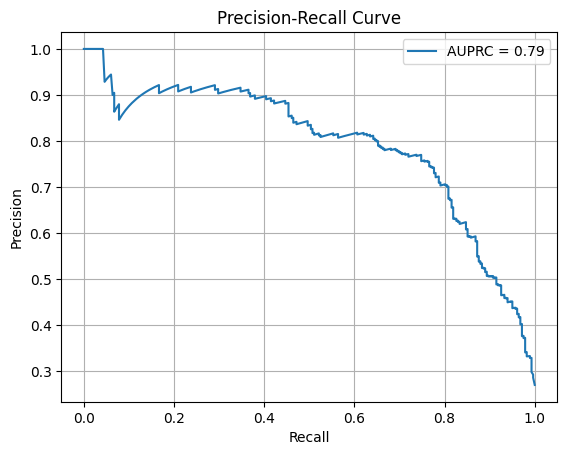


ROC Curve:


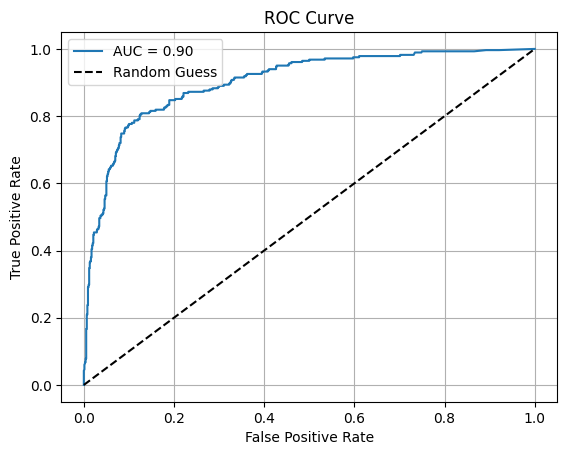


Mean F1 Score: 0.8248
Balanced Accuracy: 0.8389
Average AUPRC: 0.7921

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       760
           1       0.71      0.80      0.75       282

    accuracy                           0.86      1042
   macro avg       0.81      0.84      0.82      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6867, Accuracy: 0.5893
Validation Loss: 0.6842, Validation Accuracy: 0.6418
Epoch [2/100], Loss: 0.6680, Accuracy: 0.6746
Validation Loss: 0.6532, Validation Accuracy: 0.7153
Epoch [3/100], Loss: 0.6362, Accuracy: 0.7288
Validation Loss: 0.6174, Validation Accuracy: 0.7506
Epoch [4/100], Loss: 0.6050, Accuracy: 0.7806
Validation Loss: 0.5914, Validation Accuracy: 0.7818
Epoch [5/100], Loss: 0.5838, Accuracy: 0.8166
Validation Loss: 0.5680, Validation Accuracy: 0.8222
Epoch [6/100], Loss: 0.5746, Accuracy: 0.8264
Validation Loss: 0.5597, V

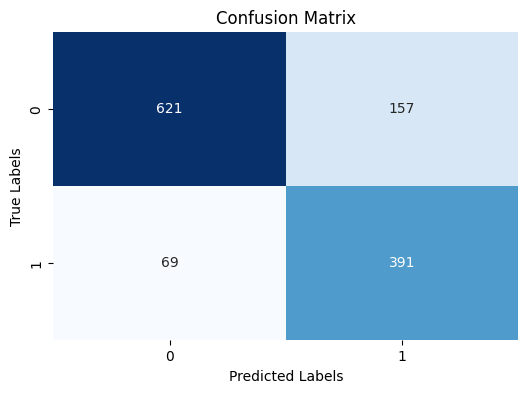


Class-wise Accuracy:
Class 0: 621/778 (79.82%)
Class 1: 391/460 (85.00%)

Precision-Recall Curve:


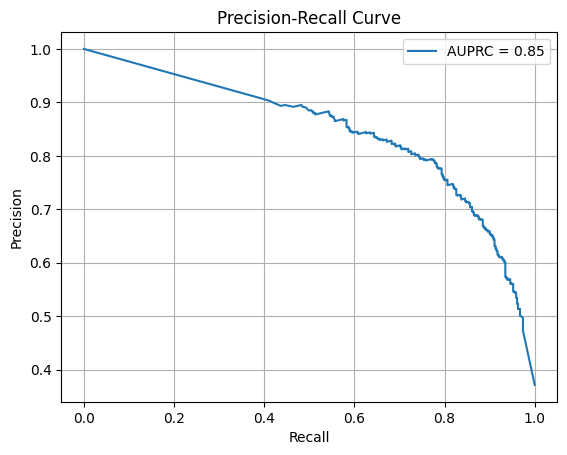


ROC Curve:


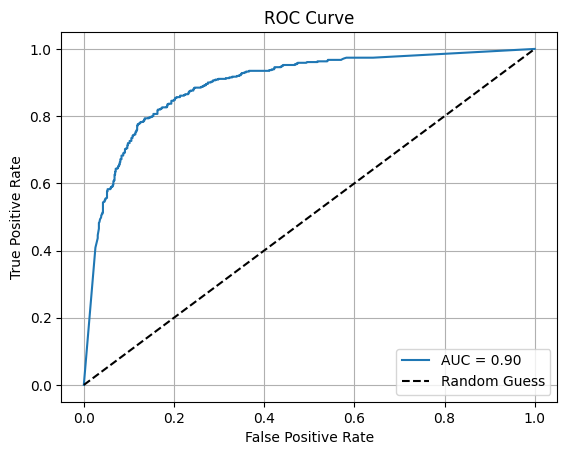


Mean F1 Score: 0.8109
Balanced Accuracy: 0.8241
Average AUPRC: 0.8457

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       778
           1       0.71      0.85      0.78       460

    accuracy                           0.82      1238
   macro avg       0.81      0.82      0.81      1238
weighted avg       0.83      0.82      0.82      1238

Fold No: 5
Epoch [1/100], Loss: 0.6861, Accuracy: 0.5723
Validation Loss: 0.6769, Validation Accuracy: 0.6659
Epoch [2/100], Loss: 0.6617, Accuracy: 0.6816
Validation Loss: 0.6340, Validation Accuracy: 0.7625
Epoch [3/100], Loss: 0.6209, Accuracy: 0.7539
Validation Loss: 0.5923, Validation Accuracy: 0.8031
Epoch [4/100], Loss: 0.5901, Accuracy: 0.8047
Validation Loss: 0.5796, Validation Accuracy: 0.8122
Epoch [5/100], Loss: 0.5759, Accuracy: 0.8207
Validation Loss: 0.5976, Validation Accuracy: 0.7953
Epoch [6/100], Loss: 0.5615, Accuracy: 0.8477
Validation Loss: 0.5667, V

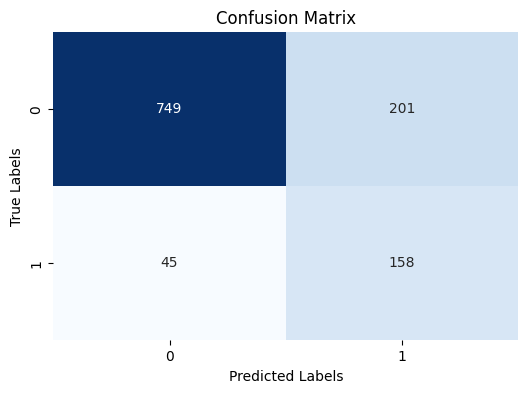


Class-wise Accuracy:
Class 0: 749/950 (78.84%)
Class 1: 158/203 (77.83%)

Precision-Recall Curve:


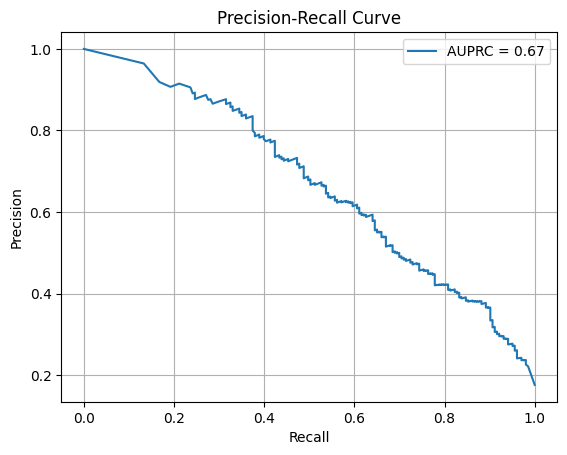


ROC Curve:


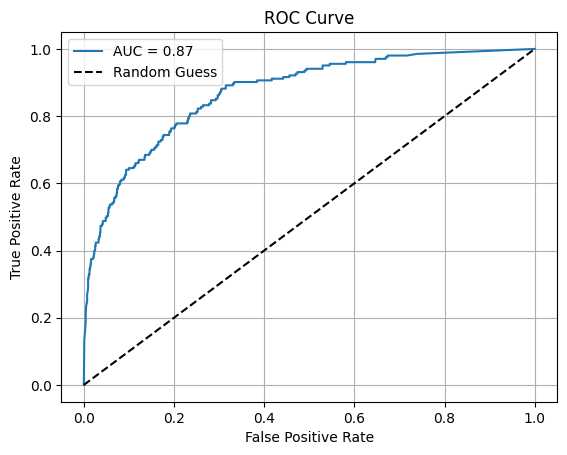


Mean F1 Score: 0.7106
Balanced Accuracy: 0.7834
Average AUPRC: 0.6703

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       950
           1       0.44      0.78      0.56       203

    accuracy                           0.79      1153
   macro avg       0.69      0.78      0.71      1153
weighted avg       0.85      0.79      0.81      1153


PARAMETER SET 1 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7543
   Fold 2: 0.7930
   Fold 3: 0.8389
   Fold 4: 0.8241
   Fold 5: 0.7834

2) Average balanced accuracy across all folds: 0.7987

3) Average AUPRC across all folds: 0.7860

4) AUPRC per fold:
   Fold 1: 0.7709
   Fold 2: 0.8509
   Fold 3: 0.7921
   Fold 4: 0.8457
   Fold 5: 0.6703

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.8763
   Class 1: 0.8014


RUNNING PARAMETER SET 2/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 

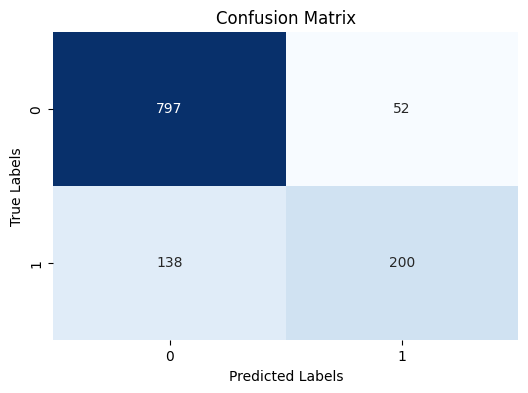


Class-wise Accuracy:
Class 0: 797/849 (93.88%)
Class 1: 200/338 (59.17%)

Precision-Recall Curve:


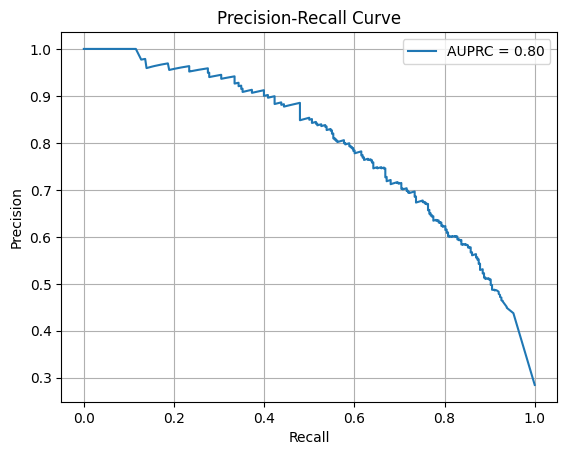


ROC Curve:


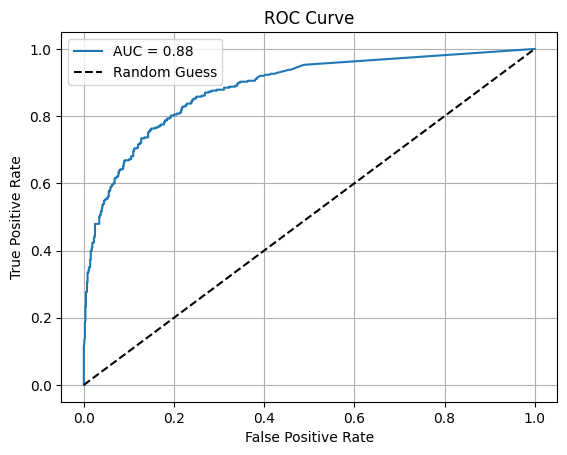


Mean F1 Score: 0.7857
Balanced Accuracy: 0.7652
Average AUPRC: 0.7954

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       849
           1       0.79      0.59      0.68       338

    accuracy                           0.84      1187
   macro avg       0.82      0.77      0.79      1187
weighted avg       0.84      0.84      0.83      1187

Fold No: 2
Epoch [1/100], Loss: 0.6836, Accuracy: 0.5767
Validation Loss: 0.6645, Validation Accuracy: 0.5900
Epoch [2/100], Loss: 0.6389, Accuracy: 0.7312
Validation Loss: 0.6209, Validation Accuracy: 0.6426
Epoch [3/100], Loss: 0.5989, Accuracy: 0.7847
Validation Loss: 0.6037, Validation Accuracy: 0.7300
Epoch [4/100], Loss: 0.5806, Accuracy: 0.8180
Validation Loss: 0.6061, Validation Accuracy: 0.7514
Epoch [5/100], Loss: 0.5674, Accuracy: 0.8466
Validation Loss: 0.5849, Validation Accuracy: 0.7325
Epoch [6/100], Loss: 0.5602, Accuracy: 0.8566
Validation Loss: 0.5868, V

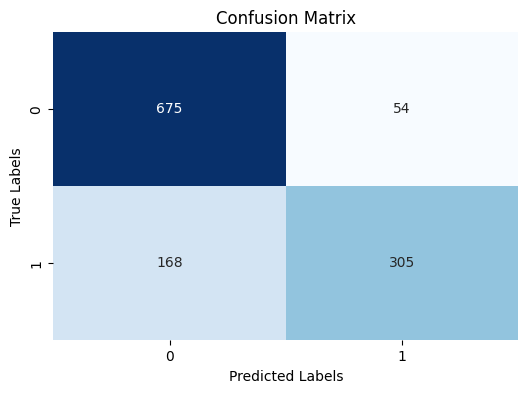


Class-wise Accuracy:
Class 0: 675/729 (92.59%)
Class 1: 305/473 (64.48%)

Precision-Recall Curve:


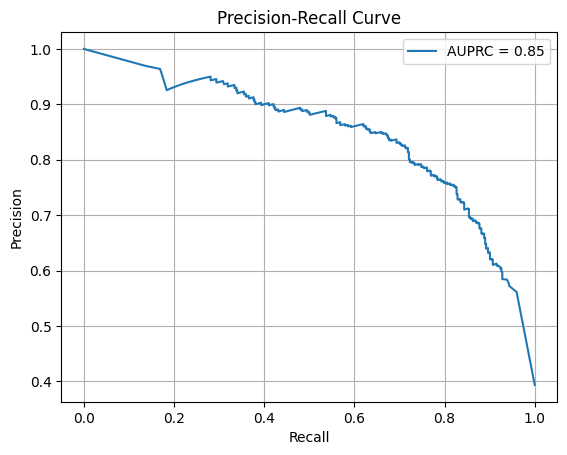


ROC Curve:


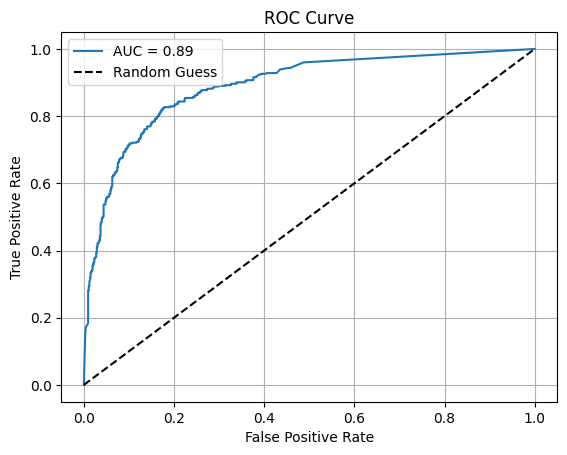


Mean F1 Score: 0.7960
Balanced Accuracy: 0.7854
Average AUPRC: 0.8470

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       729
           1       0.85      0.64      0.73       473

    accuracy                           0.82      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.82      0.82      0.81      1202

Fold No: 3
Epoch [1/100], Loss: 0.6828, Accuracy: 0.5929
Validation Loss: 0.6883, Validation Accuracy: 0.5734
Epoch [2/100], Loss: 0.6517, Accuracy: 0.6943
Validation Loss: 0.6397, Validation Accuracy: 0.7373
Epoch [3/100], Loss: 0.6078, Accuracy: 0.7837
Validation Loss: 0.6018, Validation Accuracy: 0.7483
Epoch [4/100], Loss: 0.5922, Accuracy: 0.7987
Validation Loss: 0.6056, Validation Accuracy: 0.7830
Epoch [5/100], Loss: 0.5747, Accuracy: 0.8252
Validation Loss: 0.5909, Validation Accuracy: 0.7658
Epoch [6/100], Loss: 0.5582, Accuracy: 0.8551
Validation Loss: 0.5837, V

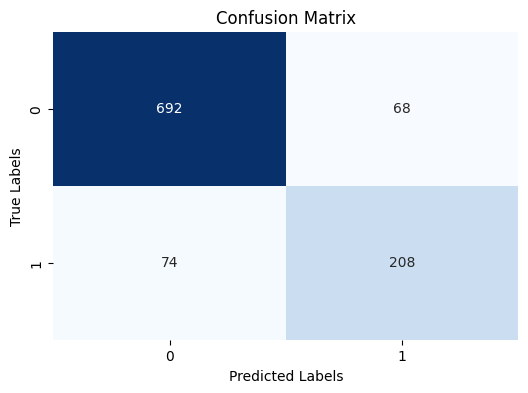


Class-wise Accuracy:
Class 0: 692/760 (91.05%)
Class 1: 208/282 (73.76%)

Precision-Recall Curve:


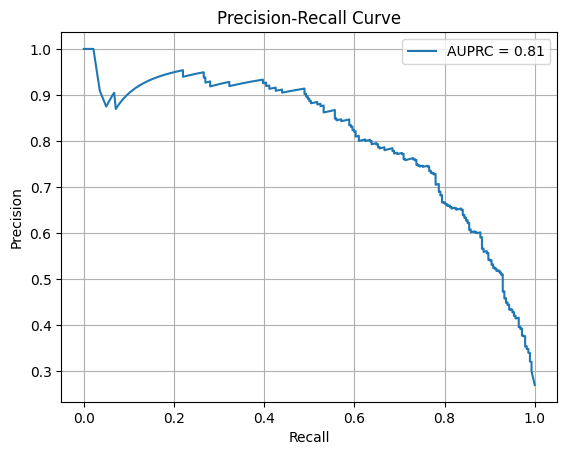


ROC Curve:


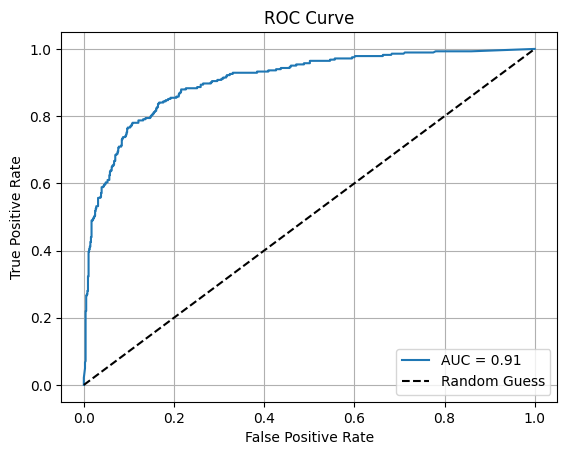


Mean F1 Score: 0.8262
Balanced Accuracy: 0.8241
Average AUPRC: 0.8072

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       760
           1       0.75      0.74      0.75       282

    accuracy                           0.86      1042
   macro avg       0.83      0.82      0.83      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6860, Accuracy: 0.5932
Validation Loss: 0.6662, Validation Accuracy: 0.6962
Epoch [2/100], Loss: 0.6613, Accuracy: 0.6770
Validation Loss: 0.6311, Validation Accuracy: 0.7360
Epoch [3/100], Loss: 0.6210, Accuracy: 0.7490
Validation Loss: 0.6054, Validation Accuracy: 0.7765
Epoch [4/100], Loss: 0.5971, Accuracy: 0.7949
Validation Loss: 0.5989, Validation Accuracy: 0.7949
Epoch [5/100], Loss: 0.5797, Accuracy: 0.8111
Validation Loss: 0.5815, Validation Accuracy: 0.8141
Epoch [6/100], Loss: 0.5695, Accuracy: 0.8343
Validation Loss: 0.6001, V

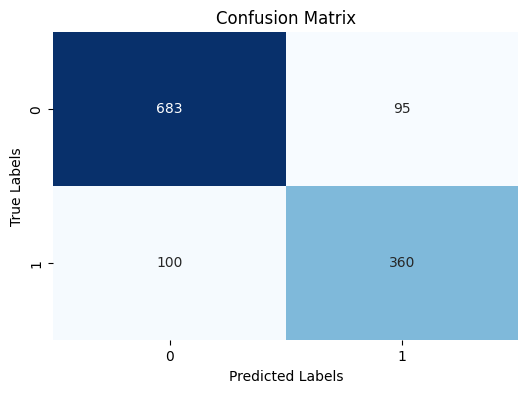


Class-wise Accuracy:
Class 0: 683/778 (87.79%)
Class 1: 360/460 (78.26%)

Precision-Recall Curve:


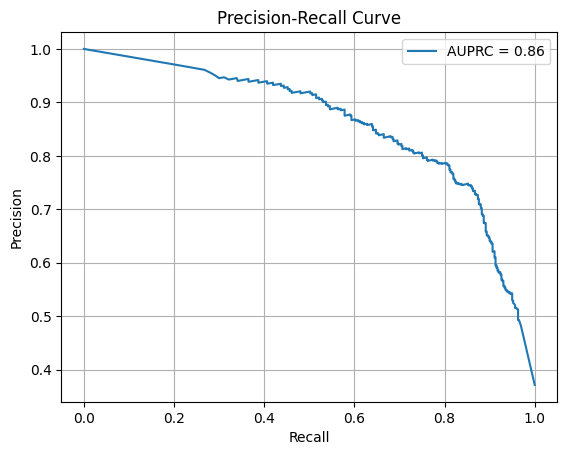


ROC Curve:


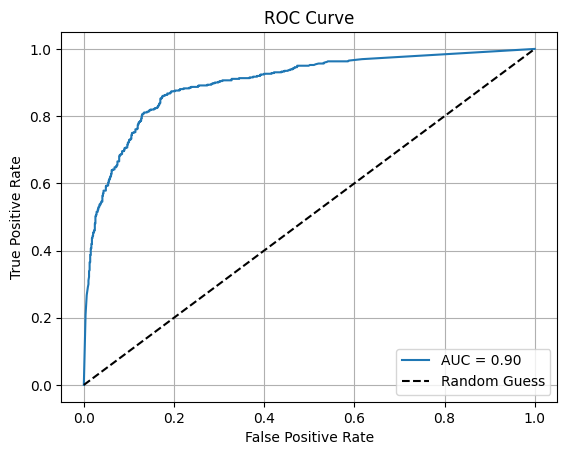


Mean F1 Score: 0.8310
Balanced Accuracy: 0.8303
Average AUPRC: 0.8596

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       778
           1       0.79      0.78      0.79       460

    accuracy                           0.84      1238
   macro avg       0.83      0.83      0.83      1238
weighted avg       0.84      0.84      0.84      1238

Fold No: 5
Epoch [1/100], Loss: 0.6845, Accuracy: 0.5778
Validation Loss: 0.6727, Validation Accuracy: 0.6870
Epoch [2/100], Loss: 0.6504, Accuracy: 0.6999
Validation Loss: 0.6058, Validation Accuracy: 0.7610
Epoch [3/100], Loss: 0.6129, Accuracy: 0.7571
Validation Loss: 0.5843, Validation Accuracy: 0.8031
Epoch [4/100], Loss: 0.5856, Accuracy: 0.8179
Validation Loss: 0.5718, Validation Accuracy: 0.8126
Epoch [5/100], Loss: 0.5729, Accuracy: 0.8298
Validation Loss: 0.5675, Validation Accuracy: 0.8159
Epoch [6/100], Loss: 0.5610, Accuracy: 0.8449
Validation Loss: 0.5786, V

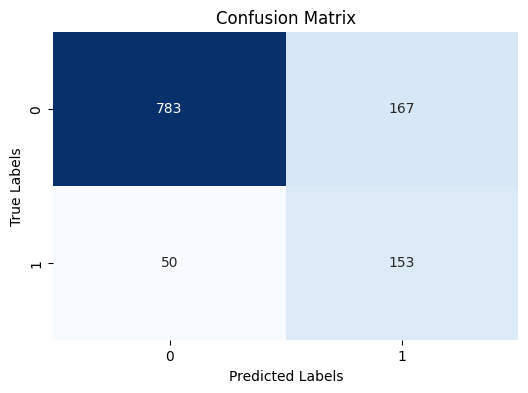


Class-wise Accuracy:
Class 0: 783/950 (82.42%)
Class 1: 153/203 (75.37%)

Precision-Recall Curve:


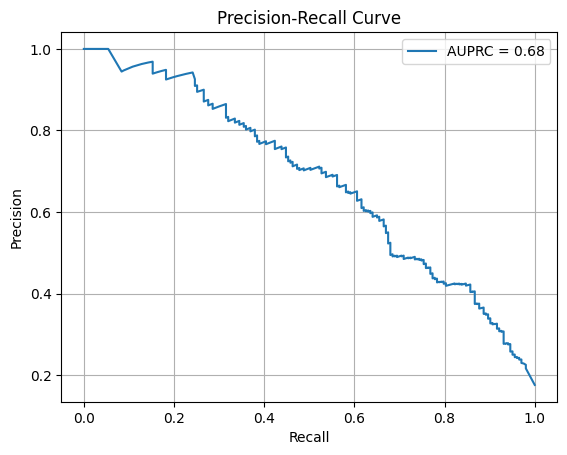


ROC Curve:


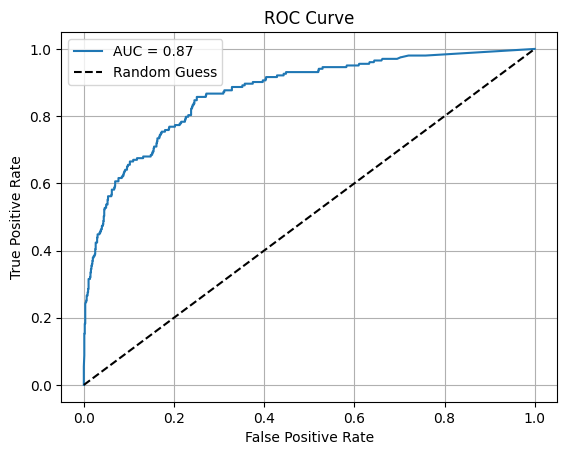


Mean F1 Score: 0.7317
Balanced Accuracy: 0.7890
Average AUPRC: 0.6776

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       950
           1       0.48      0.75      0.59       203

    accuracy                           0.81      1153
   macro avg       0.71      0.79      0.73      1153
weighted avg       0.86      0.81      0.83      1153


PARAMETER SET 2 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7652
   Fold 2: 0.7854
   Fold 3: 0.8241
   Fold 4: 0.8303
   Fold 5: 0.7890

2) Average balanced accuracy across all folds: 0.7988

3) Average AUPRC across all folds: 0.7973

4) AUPRC per fold:
   Fold 1: 0.7954
   Fold 2: 0.8470
   Fold 3: 0.8072
   Fold 4: 0.8596
   Fold 5: 0.6776

5) Best fold class-wise accuracy (Fold 4):
   Class 0: 0.8779
   Class 1: 0.7826


RUNNING PARAMETER SET 3/5
Parameters: {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 

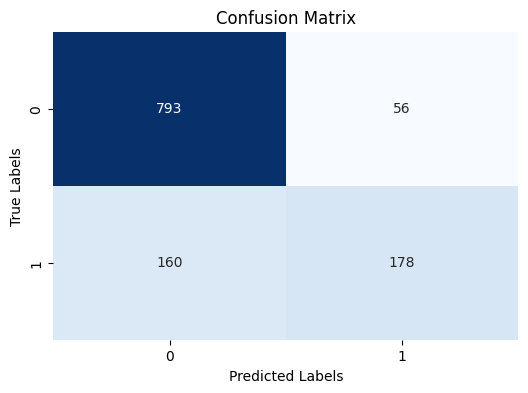


Class-wise Accuracy:
Class 0: 793/849 (93.40%)
Class 1: 178/338 (52.66%)

Precision-Recall Curve:


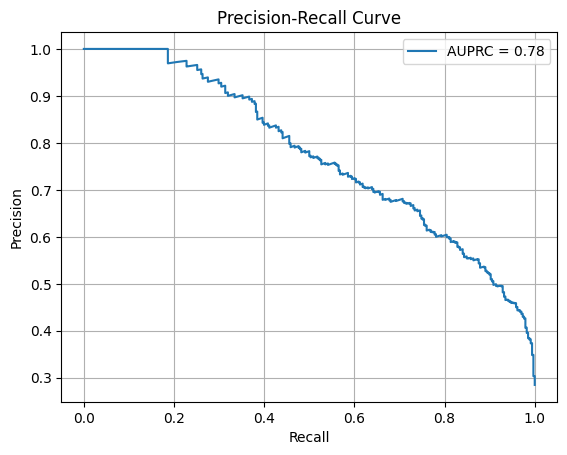


ROC Curve:


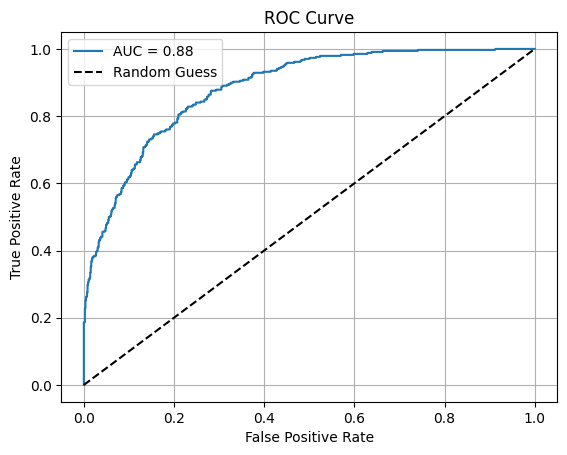


Mean F1 Score: 0.7513
Balanced Accuracy: 0.7303
Average AUPRC: 0.7750

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       849
           1       0.76      0.53      0.62       338

    accuracy                           0.82      1187
   macro avg       0.80      0.73      0.75      1187
weighted avg       0.81      0.82      0.81      1187

Fold No: 2
Epoch [1/100], Loss: 0.6400, Accuracy: 0.6937
Validation Loss: 0.5972, Validation Accuracy: 0.7014
Epoch [2/100], Loss: 0.5941, Accuracy: 0.7841
Validation Loss: 0.5985, Validation Accuracy: 0.7241
Epoch [3/100], Loss: 0.5870, Accuracy: 0.8016
Validation Loss: 0.6011, Validation Accuracy: 0.6611
Epoch [4/100], Loss: 0.5759, Accuracy: 0.8196
Validation Loss: 0.5725, Validation Accuracy: 0.7499
Epoch [5/100], Loss: 0.5733, Accuracy: 0.8164
Validation Loss: 0.5841, Validation Accuracy: 0.6764
Epoch [6/100], Loss: 0.5702, Accuracy: 0.8317
Validation Loss: 0.5786, V

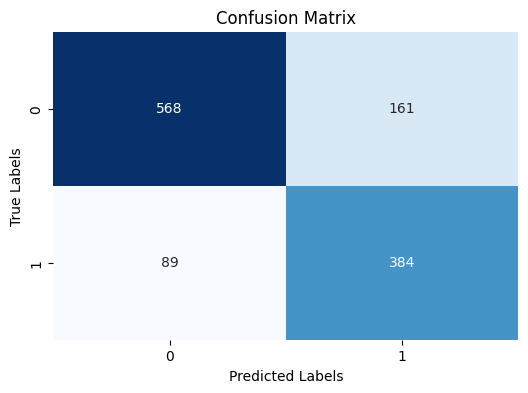


Class-wise Accuracy:
Class 0: 568/729 (77.91%)
Class 1: 384/473 (81.18%)

Precision-Recall Curve:


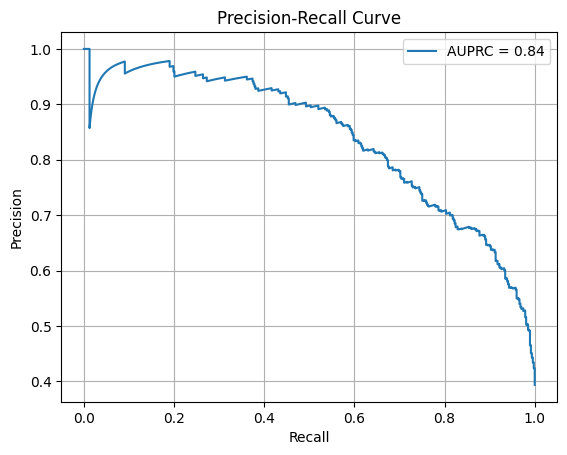


ROC Curve:


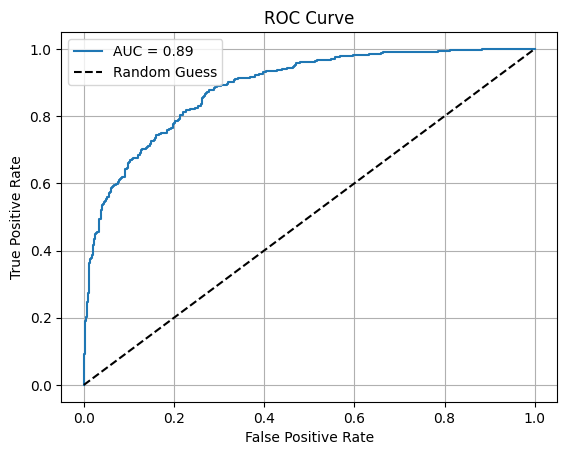


Mean F1 Score: 0.7870
Balanced Accuracy: 0.7955
Average AUPRC: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       729
           1       0.70      0.81      0.75       473

    accuracy                           0.79      1202
   macro avg       0.78      0.80      0.79      1202
weighted avg       0.80      0.79      0.79      1202

Fold No: 3
Epoch [1/100], Loss: 0.6555, Accuracy: 0.6508
Validation Loss: 0.6320, Validation Accuracy: 0.7477
Epoch [2/100], Loss: 0.6024, Accuracy: 0.7707
Validation Loss: 0.5855, Validation Accuracy: 0.7651
Epoch [3/100], Loss: 0.5884, Accuracy: 0.7942
Validation Loss: 0.5861, Validation Accuracy: 0.8022
Epoch [4/100], Loss: 0.5828, Accuracy: 0.8047
Validation Loss: 0.5811, Validation Accuracy: 0.7986
Epoch [5/100], Loss: 0.5835, Accuracy: 0.8047
Validation Loss: 0.5775, Validation Accuracy: 0.7904
Epoch [6/100], Loss: 0.5797, Accuracy: 0.8087
Validation Loss: 0.5735, V

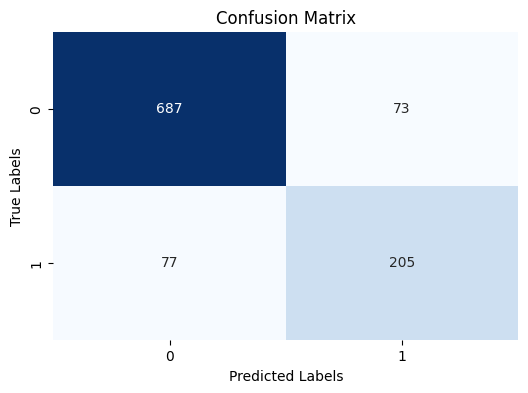


Class-wise Accuracy:
Class 0: 687/760 (90.39%)
Class 1: 205/282 (72.70%)

Precision-Recall Curve:


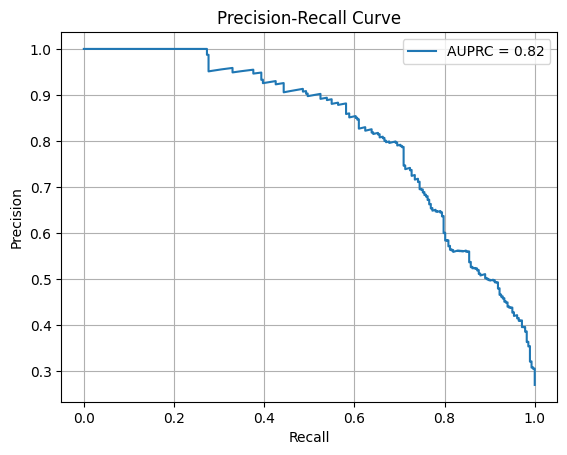


ROC Curve:


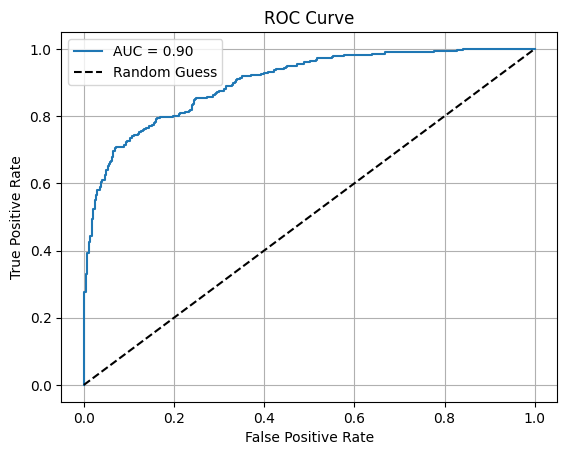


Mean F1 Score: 0.8169
Balanced Accuracy: 0.8154
Average AUPRC: 0.8221

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       760
           1       0.74      0.73      0.73       282

    accuracy                           0.86      1042
   macro avg       0.82      0.82      0.82      1042
weighted avg       0.86      0.86      0.86      1042

Fold No: 4
Epoch [1/100], Loss: 0.6637, Accuracy: 0.6262
Validation Loss: 0.6299, Validation Accuracy: 0.7513
Epoch [2/100], Loss: 0.6085, Accuracy: 0.7569
Validation Loss: 0.5670, Validation Accuracy: 0.8015
Epoch [3/100], Loss: 0.5931, Accuracy: 0.7786
Validation Loss: 0.5613, Validation Accuracy: 0.8039
Epoch [4/100], Loss: 0.5913, Accuracy: 0.7885
Validation Loss: 0.5505, Validation Accuracy: 0.8102
Epoch [5/100], Loss: 0.5902, Accuracy: 0.7904
Validation Loss: 0.5535, Validation Accuracy: 0.7824
Epoch [6/100], Loss: 0.5846, Accuracy: 0.8062
Validation Loss: 0.5782, V

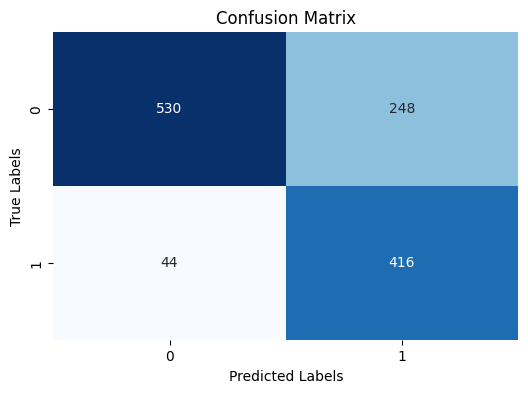


Class-wise Accuracy:
Class 0: 530/778 (68.12%)
Class 1: 416/460 (90.43%)

Precision-Recall Curve:


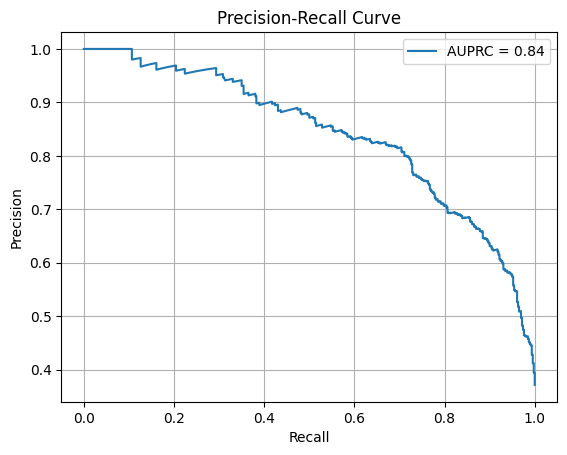


ROC Curve:


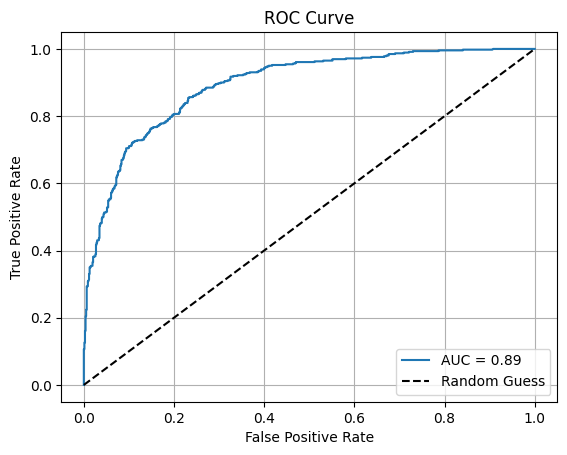


Mean F1 Score: 0.7621
Balanced Accuracy: 0.7928
Average AUPRC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       778
           1       0.63      0.90      0.74       460

    accuracy                           0.76      1238
   macro avg       0.77      0.79      0.76      1238
weighted avg       0.81      0.76      0.77      1238

Fold No: 5
Epoch [1/100], Loss: 0.6592, Accuracy: 0.6354
Validation Loss: 0.6187, Validation Accuracy: 0.7570
Epoch [2/100], Loss: 0.6003, Accuracy: 0.7717
Validation Loss: 0.5976, Validation Accuracy: 0.7933
Epoch [3/100], Loss: 0.5843, Accuracy: 0.7996
Validation Loss: 0.5855, Validation Accuracy: 0.8197
Epoch [4/100], Loss: 0.5771, Accuracy: 0.8138
Validation Loss: 0.6055, Validation Accuracy: 0.7883
Epoch [5/100], Loss: 0.5770, Accuracy: 0.8092
Validation Loss: 0.5660, Validation Accuracy: 0.8179
Epoch [6/100], Loss: 0.5790, Accuracy: 0.8129
Validation Loss: 0.5719, V

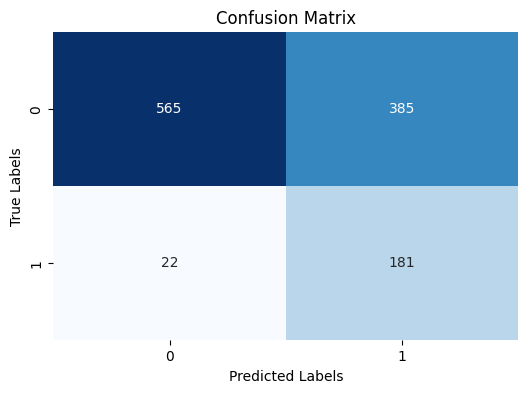


Class-wise Accuracy:
Class 0: 565/950 (59.47%)
Class 1: 181/203 (89.16%)

Precision-Recall Curve:


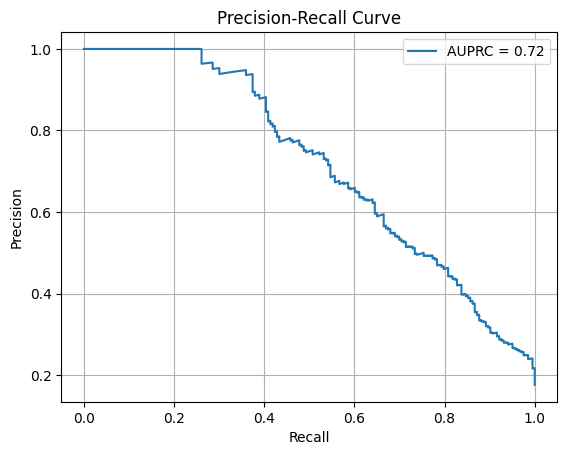


ROC Curve:


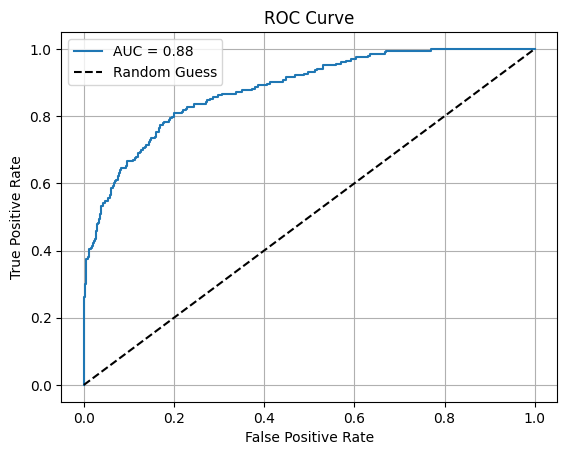


Mean F1 Score: 0.6030
Balanced Accuracy: 0.7432
Average AUPRC: 0.7157

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.74       950
           1       0.32      0.89      0.47       203

    accuracy                           0.65      1153
   macro avg       0.64      0.74      0.60      1153
weighted avg       0.85      0.65      0.69      1153


PARAMETER SET 3 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7303
   Fold 2: 0.7955
   Fold 3: 0.8154
   Fold 4: 0.7928
   Fold 5: 0.7432

2) Average balanced accuracy across all folds: 0.7754

3) Average AUPRC across all folds: 0.7986

4) AUPRC per fold:
   Fold 1: 0.7750
   Fold 2: 0.8395
   Fold 3: 0.8221
   Fold 4: 0.8404
   Fold 5: 0.7157

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.9039
   Class 1: 0.7270


RUNNING PARAMETER SET 4/5
Parameters: {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.2, 'learning_rate': 0.000103716567919

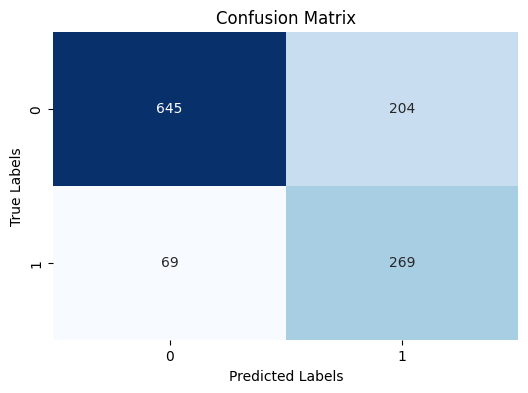


Class-wise Accuracy:
Class 0: 645/849 (75.97%)
Class 1: 269/338 (79.59%)

Precision-Recall Curve:


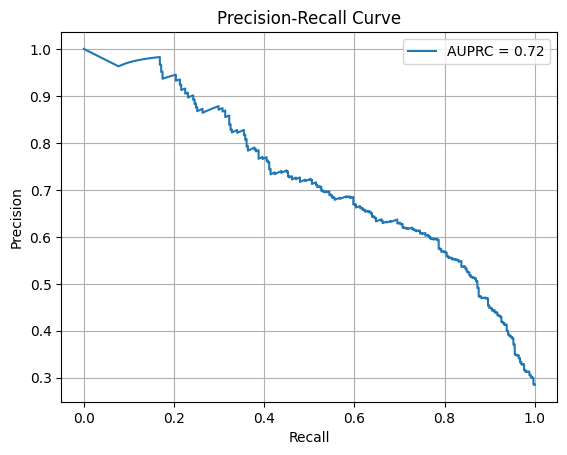


ROC Curve:


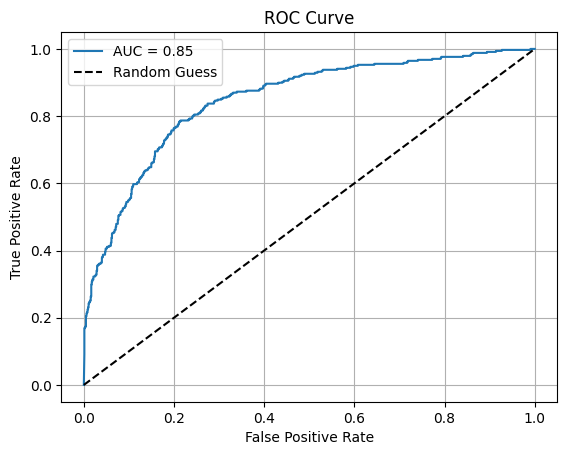


Mean F1 Score: 0.7444
Balanced Accuracy: 0.7778
Average AUPRC: 0.7224

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       849
           1       0.57      0.80      0.66       338

    accuracy                           0.77      1187
   macro avg       0.74      0.78      0.74      1187
weighted avg       0.81      0.77      0.78      1187

Fold No: 2
Epoch [1/100], Loss: 0.6795, Accuracy: 0.5804
Validation Loss: 0.6536, Validation Accuracy: 0.6582
Epoch [2/100], Loss: 0.6441, Accuracy: 0.6937
Validation Loss: 0.6323, Validation Accuracy: 0.5682
Epoch [3/100], Loss: 0.6442, Accuracy: 0.6894
Validation Loss: 0.7381, Validation Accuracy: 0.6365
Epoch [4/100], Loss: 0.6407, Accuracy: 0.6984
Validation Loss: 0.6205, Validation Accuracy: 0.6695
Epoch [5/100], Loss: 0.6221, Accuracy: 0.7249
Validation Loss: 0.7930, Validation Accuracy: 0.6078
Epoch [6/100], Loss: 0.6233, Accuracy: 0.7275
Validation Loss: 0.6336, V

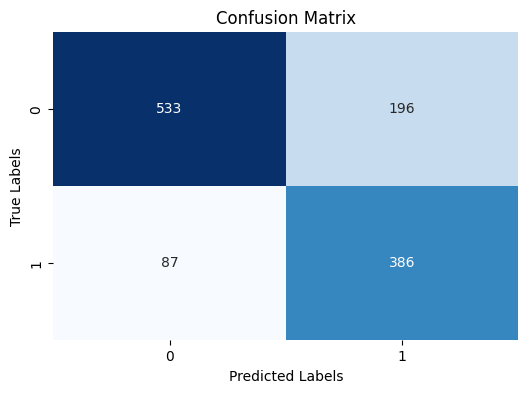


Class-wise Accuracy:
Class 0: 533/729 (73.11%)
Class 1: 386/473 (81.61%)

Precision-Recall Curve:


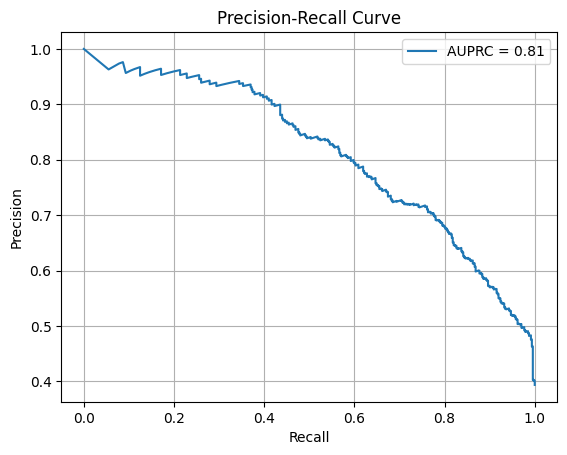


ROC Curve:


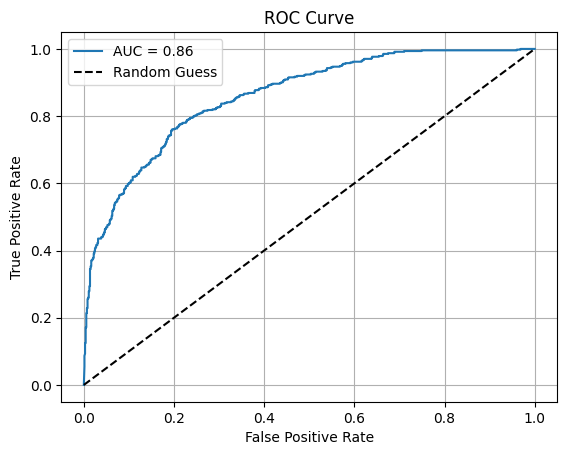


Mean F1 Score: 0.7610
Balanced Accuracy: 0.7736
Average AUPRC: 0.8121

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       729
           1       0.66      0.82      0.73       473

    accuracy                           0.76      1202
   macro avg       0.76      0.77      0.76      1202
weighted avg       0.78      0.76      0.77      1202

Fold No: 3
Epoch [1/100], Loss: 0.6841, Accuracy: 0.5639
Validation Loss: 0.6780, Validation Accuracy: 0.6805
Epoch [2/100], Loss: 0.6471, Accuracy: 0.6873
Validation Loss: 0.6490, Validation Accuracy: 0.6879
Epoch [3/100], Loss: 0.6339, Accuracy: 0.7068
Validation Loss: 0.6469, Validation Accuracy: 0.7250
Epoch [4/100], Loss: 0.6282, Accuracy: 0.7273
Validation Loss: 0.6277, Validation Accuracy: 0.7043
Epoch [5/100], Loss: 0.6273, Accuracy: 0.7218
Validation Loss: 0.6083, Validation Accuracy: 0.7745
Epoch [6/100], Loss: 0.6210, Accuracy: 0.7373
Validation Loss: 0.6381, V

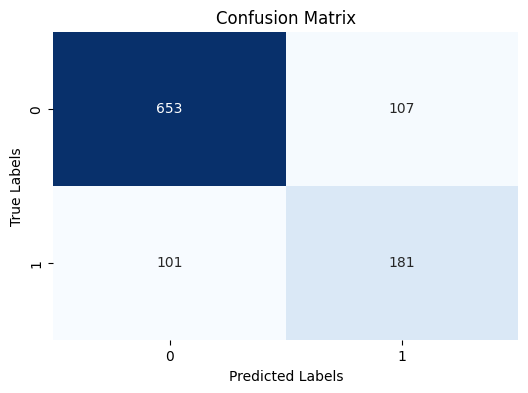


Class-wise Accuracy:
Class 0: 653/760 (85.92%)
Class 1: 181/282 (64.18%)

Precision-Recall Curve:


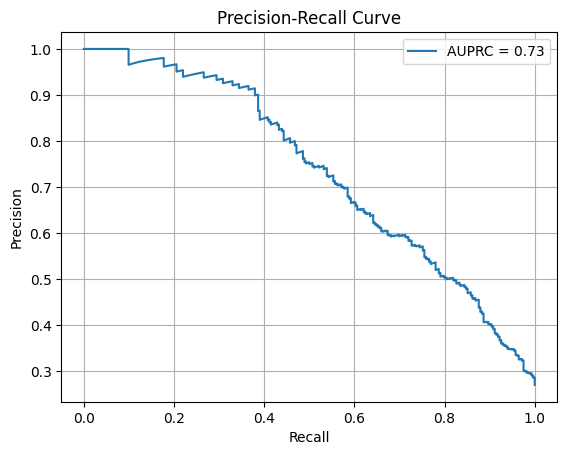


ROC Curve:


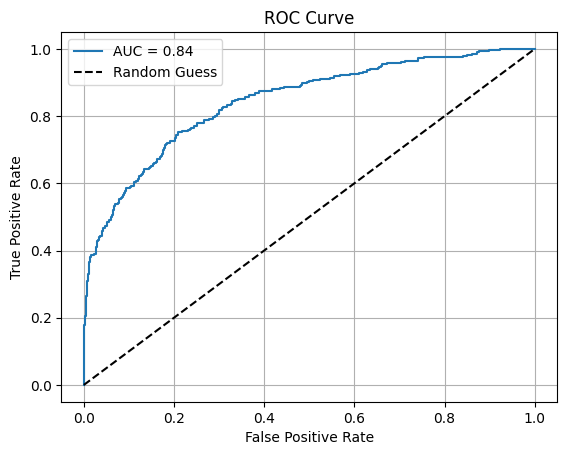


Mean F1 Score: 0.7489
Balanced Accuracy: 0.7505
Average AUPRC: 0.7342

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       760
           1       0.63      0.64      0.64       282

    accuracy                           0.80      1042
   macro avg       0.75      0.75      0.75      1042
weighted avg       0.80      0.80      0.80      1042

Fold No: 4
Epoch [1/100], Loss: 0.6917, Accuracy: 0.5256
Validation Loss: 0.7024, Validation Accuracy: 0.5814
Epoch [2/100], Loss: 0.6655, Accuracy: 0.6381
Validation Loss: 0.6371, Validation Accuracy: 0.7120
Epoch [3/100], Loss: 0.6439, Accuracy: 0.6844
Validation Loss: 0.6249, Validation Accuracy: 0.7245
Epoch [4/100], Loss: 0.6360, Accuracy: 0.6982
Validation Loss: 0.6120, Validation Accuracy: 0.7446
Epoch [5/100], Loss: 0.6455, Accuracy: 0.6898
Validation Loss: 0.6908, Validation Accuracy: 0.6828
Epoch [6/100], Loss: 0.6293, Accuracy: 0.7253
Validation Loss: 0.6510, V

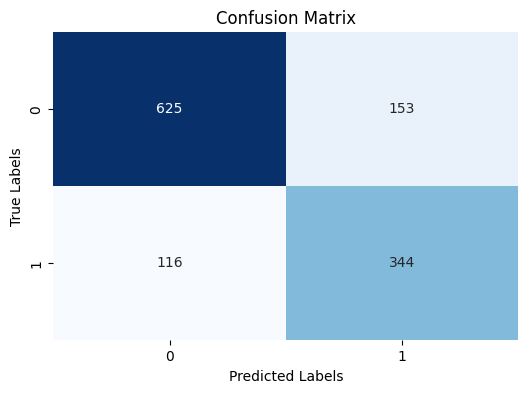


Class-wise Accuracy:
Class 0: 625/778 (80.33%)
Class 1: 344/460 (74.78%)

Precision-Recall Curve:


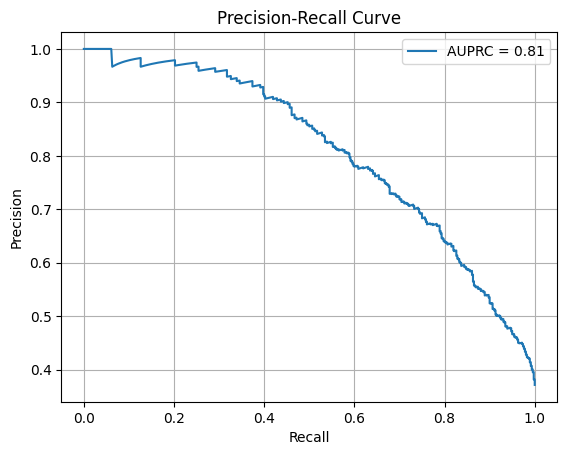


ROC Curve:


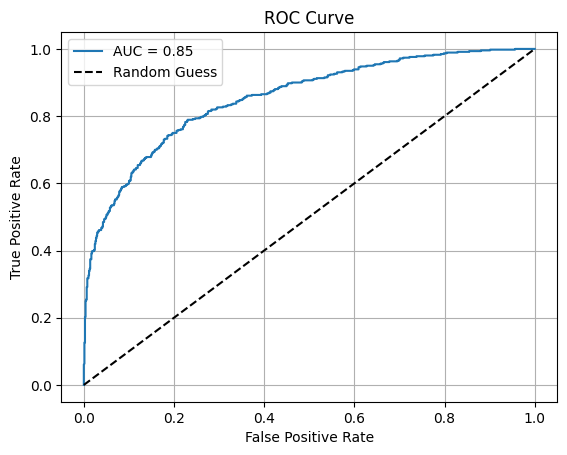


Mean F1 Score: 0.7709
Balanced Accuracy: 0.7756
Average AUPRC: 0.8086

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       778
           1       0.69      0.75      0.72       460

    accuracy                           0.78      1238
   macro avg       0.77      0.78      0.77      1238
weighted avg       0.79      0.78      0.78      1238

Fold No: 5
Epoch [1/100], Loss: 0.6772, Accuracy: 0.5842
Validation Loss: 0.6511, Validation Accuracy: 0.7098
Epoch [2/100], Loss: 0.6455, Accuracy: 0.6825
Validation Loss: 0.6767, Validation Accuracy: 0.6806
Epoch [3/100], Loss: 0.6376, Accuracy: 0.6981
Validation Loss: 0.6134, Validation Accuracy: 0.7532
Epoch [4/100], Loss: 0.6205, Accuracy: 0.7347
Validation Loss: 0.6140, Validation Accuracy: 0.7430
Epoch [5/100], Loss: 0.6219, Accuracy: 0.7324
Validation Loss: 0.5989, Validation Accuracy: 0.7463
Epoch [6/100], Loss: 0.6173, Accuracy: 0.7370
Validation Loss: 0.6298, V

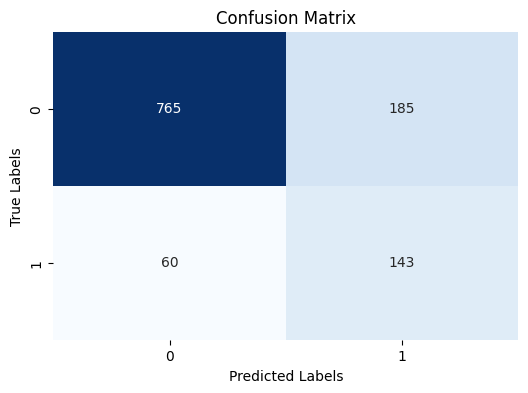


Class-wise Accuracy:
Class 0: 765/950 (80.53%)
Class 1: 143/203 (70.44%)

Precision-Recall Curve:


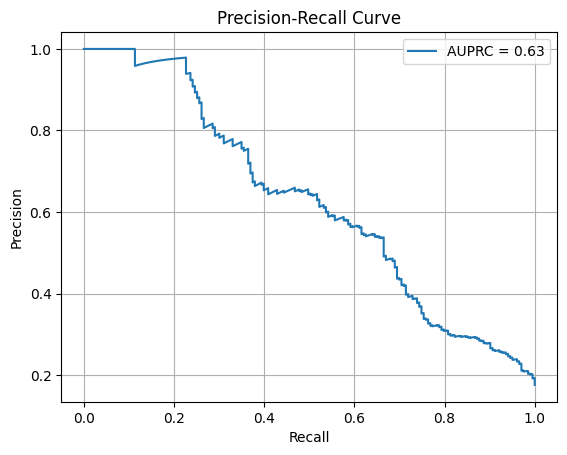


ROC Curve:


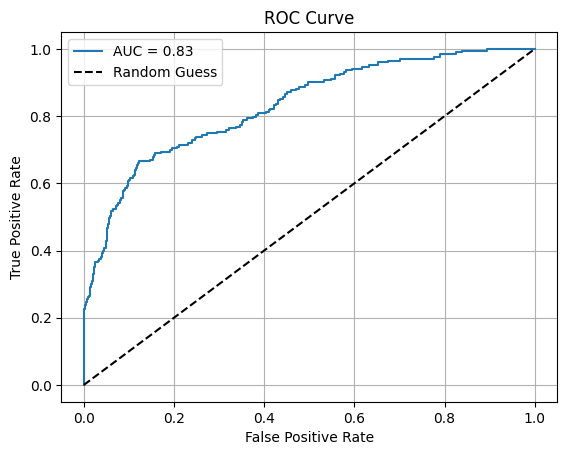


Mean F1 Score: 0.7003
Balanced Accuracy: 0.7548
Average AUPRC: 0.6261

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       950
           1       0.44      0.70      0.54       203

    accuracy                           0.79      1153
   macro avg       0.68      0.75      0.70      1153
weighted avg       0.84      0.79      0.81      1153


PARAMETER SET 4 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7778
   Fold 2: 0.7736
   Fold 3: 0.7505
   Fold 4: 0.7756
   Fold 5: 0.7548

2) Average balanced accuracy across all folds: 0.7665

3) Average AUPRC across all folds: 0.7407

4) AUPRC per fold:
   Fold 1: 0.7224
   Fold 2: 0.8121
   Fold 3: 0.7342
   Fold 4: 0.8086
   Fold 5: 0.6261

5) Best fold class-wise accuracy (Fold 1):
   Class 0: 0.7597
   Class 1: 0.7959


ALL PARAMETER SETS COMPLETED!


In [ ]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

top_params = [
    # {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 8.41673746313518e-06, 'weight_decay': 2.671260614647494e-05, 'batch_size': 10}, # Accuracy: 0.5649, Trial: 7
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.1, 'learning_rate': 3.1698115236603614e-06, 'weight_decay': 4.8990822406347735e-06, 'batch_size': 10}, # Accuracy: 0.5447, Trial: 18
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 4.041251088887564e-06, 'weight_decay': 5.788250075003372e-06, 'batch_size': 10}, # Accuracy: 0.5413, Trial: 17
    {'hidden_size': 1024, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 2.553105885330496e-05, 'weight_decay': 7.720918959587612e-06, 'batch_size': 10}, # Accuracy: 0.5046, Trial: 13
    {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.2, 'learning_rate': 0.00010371656791920614, 'weight_decay': 0.0002740103506586785, 'batch_size': 16}  # Accuracy: 0.4867, Trial: 11
]

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

# Model and training configurations
num_classes = 2
input_size = 224 * 3
epochs = 100
input_size = 224*3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file

    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }

    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc

    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)

    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])

    # Check if file exists
    file_exists = os.path.isfile(csv_path)

    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")
    
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Loop through all parameter sets
for param_idx, params in enumerate(top_params):
    print(f"\n{'='*80}")
    print(f"RUNNING PARAMETER SET {param_idx + 1}/5")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Extract parameters
    hidden_size = params["hidden_size"]
    num_layers = params.get("num_layers", 1)
    dropout = params["dropout"]
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']

    # Initialize lists for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')

        # Initialize model, loss, and optimizer
        fold_model = LstmAttention(
              input_size=input_size,
              hidden_size=hidden_size,
              num_layers=num_layers,
              num_classes=num_classes,
              dropout=dropout
              ).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)

        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*train_data.shape[3]))
        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)

        early_stopping = EarlyStopping(patience=10)

        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold]
            val_data = val_data.reshape((val_data.shape[0],val_data.shape[1],val_data.shape[2]*val_data.shape[3]))  # reshape to lstm input shape
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold]
        test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*test_data.shape[3]))  # reshape to lstm input shape
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Calculate class-wise accuracy
        class_accuracies = cm.diagonal() / cm.sum(axis=1)
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)

    # Find best fold based on balanced accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]

    print("\n" + "="*60)
    print(f"PARAMETER SET {param_idx + 1} RESULTS SUMMARY")
    print("="*60)

    print(f'\n1) Balanced accuracy for each fold:')
    for i, acc in enumerate(fold_accuracies):
        print(f'   Fold {i+1}: {acc:.4f}')

    print(f'\n2) Average balanced accuracy across all folds: {mean_accuracy:.4f}')

    print(f'\n3) Average AUPRC across all folds: {average_auprc:.4f}')

    print(f'\n4) AUPRC per fold:')
    for i, auprc in enumerate(fold_auprcs):
        print(f'   Fold {i+1}: {auprc:.4f}')

    print(f'\n5) Best fold class-wise accuracy (Fold {best_fold_idx+1}):')
    for i, class_acc in enumerate(best_fold_class_accuracies):
        print(f'   Class {i}: {class_acc:.4f}')

    print("\n" + "="*60)
    
    # Save results for this parameter set
    model_info = f"LstmAttention_paramset_{param_idx+1}_hidden_{hidden_size}_layers_{num_layers}_dropout_{dropout}"

print(f"\n{'='*80}")
print("ALL PARAMETER SETS COMPLETED!")
print(f"{'='*80}")
